In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [84]:
#i数据文件导入
data = pd.read_csv("./energydata_complete.csv")

In [85]:
data = pd.DataFrame(data)

In [86]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016/1/11 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016/1/11 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  2016/1/11 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  2016/1/11 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  2016/1/11 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...    T8       RH_8         T9   RH_9  T_out  \
0  19.79  44.730000  19.000000  ...  18.2  48.900000  17.033333  45.53   6.60   
1  19.79  44.790000  19.000000  ...  18.2  48.863333  17.066667  45.56   6.48   
2  19.79  44.933333  18.926667  ...  18.2  48.730000  17.000000  45.50   6.37   
3  19.79  45.000000  18.890000  ...  18.1  48.590000  17.000000  45.40   6.25   
4  19.79  45.000000  18.890000  ...  18.1  48.590000  17.000000  45.40   6.13   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  
0        733.5    92.0   7.000000   63.000000        5.3  
1        733.6    92.0   6.666667   59.166667        5.2  
2        733.7    92.0   6.333333   55.333333        5.1  
3        733.8    92.0   6.000000   51.500000        5.0  
4        733.9    92.0   5.666667   47.666667        4.9  

[5 rows x 27 columns]

In [87]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

Data Exploration

In [6]:
print('The number of rows in dataset is - ' , data.shape[0])#这里data是tuple格式，直接调用data.shape()无效
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  27


In [7]:
#空值计算
data.isnull().sum().sort_values(ascending = True)

date           0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
RH_6           0
Visibility     0
T6             0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
RH_5           0
Tdewpoint      0
dtype: int64

In [88]:
data.describe()#查看数据的整体规模，因为所有列都是数值型的，所以除了日期，其他都展示出来了

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T8          RH_8            T9          RH_9  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     22.029107     42.936165     19.485828     41.552401   
std    ...      1.956162      5.224361      2.014712      4.151497   
min    ...     16.306667     29.600000     14.890000     29.166667   
25%    ...     20.790000     39.066667     18.000000     38.500000   
50%    ...     22.100000     42.375000     19.390000     40.900000   
75%    ...     23.390000     46.536000     20.600000     44.338095   
max    ...     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.412580    755.522602     79.750418      4.039752     38.330834   
std        5.318464      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.670000    750.933333     70.333333      2.000000     29.000000   
50%        6.920000    756.100000     83.666667      3.666667     40.000000   
75%       10.400000    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint  
count  19735.000000  
mean       3.760995  
std        4.195248  
min       -6.600000  
25%        0.900000  
50%        3.430000  
75%        6.570000  
max       15.500000  

[8 rows x 26 columns]

In [9]:
data['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

Text(0.5, 1.0, 'Appliances distribution')

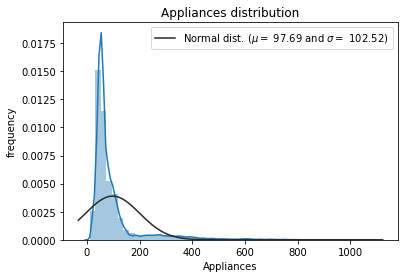

In [10]:
#首先看下我们要预测的这个目标值情况
from scipy.stats import norm
from scipy import stats
sns.distplot(data['Appliances'], fit=norm)
(mu,sigma) = norm.fit(data['Appliances'])

#Appliances分布图
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)])
plt.ylabel('frequency')
plt.title("Appliances distribution")

In [11]:
#看上去还不错，就是尾巴特别长，下面再看一下目标值的偏度值和峰度，发现数值都是很高的，等下处理
print("Skewness: %f" % data['Appliances'].skew())
print("Kurtosis:%f" % data['Appliances'].kurt())

Skewness: 3.386367
Kurtosis:13.667863


# Data Visualization

In [12]:
# plotly
#import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date ,  mode = "lines,markers", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [13]:
#查看小区间内的变化
visData = go.Scatter( x= data[:200].date ,  mode = "lines,markers", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)
iplot(fig)

In [89]:
# 增加特征值看是否是工作日
data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(int)
# There are 5472 weekend recordings 
data['WEEKDAY'].value_counts()

0    14263
1     5472
Name: WEEKDAY, dtype: int64

In [90]:
# 进一步处理，由于日期在以后的日子里不可重复，作为feature并不合适，而可以用星期数来代替
data['date']=pd.to_datetime(data['date'])
data['WhatDay'] = data['date'].map(lambda x: x.strftime('%w')) # 将日期转换为星期数
data['WhatMonth'] = data['date'].map(lambda x: x.strftime('%m')).astype(int) # 将日期转换为月份

In [91]:
# 增加一个小时数特征
data['WhatHour']  = data['date'].map(lambda x: x.strftime('%H')).astype(int)

In [92]:
# 对离散值的特征进行onehot编码
# 整数特征表示并不能在分类器中直接使用，因为这样的连续输入，估计器会认为类别之间是有序的，但实际却是无序的。
# 需要通过one-hot编码，将离散特征的取值扩展到了欧式空间
# 特征之间距离的计算或相似度的计算是非常重要的，而我们常用的距离或相似度的计算都是在欧式空间的相似度计算,通过one-hot编码，确实会让特征之间的距离计算更加合理
# 简而言之，就是离散值之间如果没有大小的概念，就有必要用onehot，如果没有就没有必要
data = pd.get_dummies(data)

In [93]:
# data[['date','WEEKDAY','WhatDay','WhatMonth']].tail(10)
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'WEEKDAY', 'WhatMonth', 'WhatHour',
       'WhatDay_0', 'WhatDay_1', 'WhatDay_2', 'WhatDay_3', 'WhatDay_4',
       'WhatDay_5', 'WhatDay_6'],
      dtype='object')

In [19]:
# Find rows with weekday 
# temp_weekday =  data[data['WEEKDAY'] == 0]
# # To understand the timeseries variation of the applaince energy consumption
# visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines,markers", y = temp_weekday.Appliances )
# layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
# fig = go.Figure(data=[visData],layout=layout)

# iplot(fig)

In [20]:
# Find rows with weekend 

# temp_weekend =  data[data['WEEKDAY'] == 1]

# # To understand the timeseries variation of the applaince energy consumption
# visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines,markers", y = temp_weekend.Appliances )
# layout = go.Layout(title = 'Appliance energy consumption pattern on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
# fig = go.Figure(data=[visData],layout=layout)

# iplot(fig)

In [21]:
# Histogram of all the features to understand the distribution
# data.hist(bins = 20 , figsize= (12,16)) ;

In [22]:
#把所有待选特征的偏置度从大到小列出来
# from scipy.stats import norm,skew
# skew_feats =data.drop(['date'],axis=1,inplace=False).apply(lambda x:skew(x)).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew':skew_feats})
# skewness

In [23]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
# f, ax = plt.subplots(3,3,figsize=(12,8))
# vis1 = sns.distplot(data["lights"],bins=10, ax= ax[0][0])
# vis2 = sns.distplot(data["RH_5"],bins=10, ax= ax[0][1])
# vis3 = sns.distplot(data["WEEKDAY"],bins=10, ax= ax[0][2])
# vis4 = sns.distplot(data["T2"],bins=10, ax= ax[1][0])
# vis5 = sns.distplot(data["WEEKDAY"],bins=10, ax= ax[1][1])



# vis6 = sns.distplot(data["RH_6"],bins=10, ax= ax[1][2])
# vis7 = sns.distplot(data["RH_out"],bins=10, ax=ax[2][0])
# vis8 = sns.distplot(data["Visibility"],bins=10, ax=ax[2][1])
# vis9 = sns.distplot(data["Windspeed"],bins=10, ax=ax[2][2])

In [24]:
#对偏置度够高的待选特征值要做log变换，使其更符合正太分布，但是不是真的有必要进行这样的变换

# skewness = skewness[abs(skewness['Skew']) > 0.75]
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lamd = 0
# for feat in skewed_features:
#     data[feat] = boxcox1p(data[feat], lamd)
# #做了log函数后再次看一下现在的偏置度情况，
# skew_feats =data.drop(['date'],axis=1,inplace=False).apply(lambda x:skew(x)).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew':skew_feats})
# skewness


# Correlation plot

In [94]:
from sklearn.model_selection import train_test_split
# 80% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.2,random_state=40)#这里随机数种子就是为了得到一组同样的数据用于做对比

In [194]:
data

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...  WEEKDAY  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...        0   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...        0   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...        0   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...        0   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...        0   
...          ...        ...        ...        ...        ...  ...      ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...        0   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...        0   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...        0   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...        0   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...        0   

       WhatMonth  WhatHour  WhatDay_0  WhatDay_1  WhatDay_2  WhatDay_3  \
0              1        17          0          1          0          0   
1              1        17          0          1          0          0   
2              1        17          0          1          0          0   
3              1        17          0          1          0          0   
4              1        17          0          1          0          0   
...          ...       ...        ...        ...        ...        ...   
19730          5        17          0          0          0          0   
19731          5        17          0          0          0          0   
19732          5        17          0          0          0          0   
19733          5        17          0          0          0          0   
19734          5        18          0          0          0          0   

       WhatDay_4  WhatDay_5  WhatDay_6  
0              0          0          0  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
19730          0          1          0  
19731          0          1          0  
19732          0          1          0  
19733          0          1          0  
19734          0          1          0  

[19735 rows x 37 columns]

In [95]:
# 对所有特征值做分类
col_time=["date"]
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_weekday = [ 'WEEKDAY', 'WhatMonth',
       'WhatDay_0', 'WhatDay_1', 'WhatDay_2', 'WhatDay_3', 'WhatDay_4',
       'WhatDay_5', 'WhatDay_6','WhatHour']
col_target = ["Appliances"]

In [96]:
# 把目标值和所有待选的特征值分开
feature_vars = data[col_temp + col_hum + col_weather + col_light  + col_weekday]#没有了时间和负荷数据
target_vars = data[col_target]

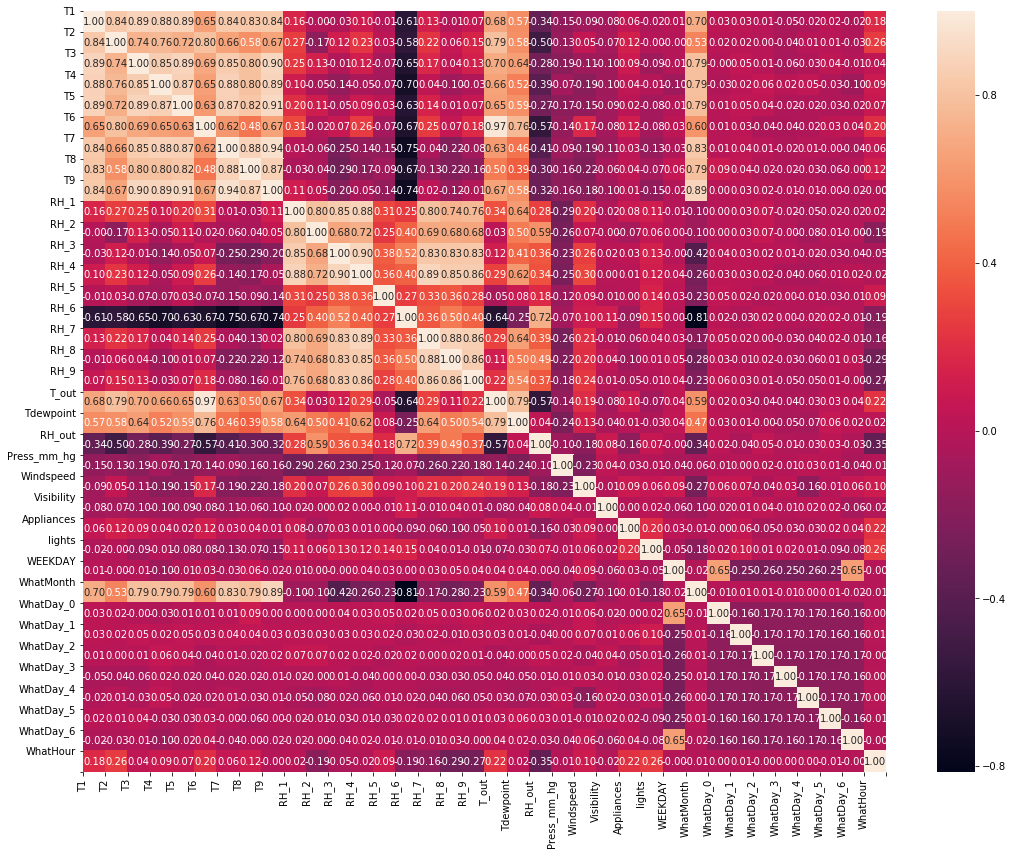

In [28]:
train_corr = train[col_temp + col_hum + col_weather +col_target+col_light+col_weekday]
corr = train_corr.corr()
# Mask the repeated values
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , )#mask=mask,
    #Apply xticks
plt.xticks(range(len(corr.columns)+1), corr.columns)
    #Apply yticks
plt.yticks(range(len(corr.columns)+1), corr.columns)
    #show plot
plt.show()

In [29]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations


0
T6   T_out      0.974530
T7   T9         0.944040
T5   T9         0.910518
T3   T9         0.900996
RH_3 RH_4       0.899459
RH_4 RH_7       0.894588
T1   T3         0.892857
T9   WhatMonth  0.890328
T4   T9         0.888917
T3   T5         0.888649
T1   T5         0.885385
RH_7 RH_8       0.884228
T7   T8         0.881532
RH_1 RH_4       0.880205
T4   T7         0.877290
T1   T4         0.876996
T4   T5         0.872149
T5   T7         0.869847
T8   T9         0.868543
RH_7 RH_9       0.859545
RH_4 RH_9       0.857135
RH_8 RH_9       0.856992
T3   T4         0.852899
RH_4 RH_8       0.848080
T3   T7         0.846884
RH_1 RH_3       0.845058
T1   T9         0.843789
     T7         0.837853
     T2         0.836188
RH_3 RH_9       0.833754
     RH_7       0.833506
T7   WhatMonth  0.833032
RH_3 RH_8       0.829869
T1   T8         0.825500
T5   T8         0.824341
RH_6 WhatMonth  0.813911
T2   T6         0.800786
RH_1 RH_7       0.800779
     RH_2       0.798200
T4   T8         0.796485

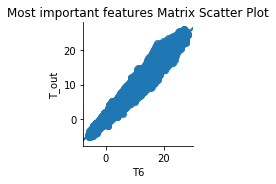

In [30]:
sns.pairplot(data,x_vars=['T6'], y_vars='T_out', kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

In [31]:
k=100
corr.nlargest(k, 'Appliances')['Appliances']

Appliances     1.000000
WhatHour       0.215592
lights         0.197090
T2             0.122202
T6             0.120932
T_out          0.101857
T3             0.086747
Windspeed      0.086166
RH_1           0.082857
T1             0.056806
WhatDay_1      0.056678
T8             0.043230
T4             0.041874
WhatDay_6      0.037161
RH_3           0.034139
T7             0.027966
WEEKDAY        0.025482
WhatDay_5      0.020365
T5             0.019675
RH_4           0.014873
Tdewpoint      0.013362
T9             0.011844
RH_5           0.001040
Visibility     0.000882
WhatDay_0     -0.004031
WhatMonth     -0.009287
WhatDay_4     -0.029804
Press_mm_hg   -0.030495
WhatDay_3     -0.031080
WhatDay_2     -0.046949
RH_9          -0.052693
RH_7          -0.057373
RH_2          -0.065406
RH_6          -0.089612
RH_8          -0.096341
RH_out        -0.158356
Name: Appliances, dtype: float64

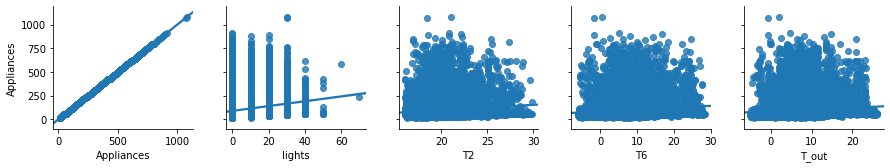

In [32]:
sns.pairplot(data,x_vars=['Appliances','lights','T2','T6','T_out'], y_vars=['Appliances'], kind="reg")
plt.show()

# Data Pre processing

In [33]:
#目标值做正态分布变换，右边的尾巴小一点，左边的尾巴大一点
# from scipy.stats import norm
# from scipy import stats
# sns.distplot(data['Appliances'], fit=norm)
# (mu,sigma) = norm.fit(data['Appliances'])

# #分布图
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)])
# plt.ylabel('frequency')
# plt.title("Appliances distribution")

# #QQ图
# figure = plt.figure()
# res = stats.probplot(data['Appliances'], plot=plt)
# plt.show()

# #是否真的要做log变换

# # data['Appliances'] = np.log1p(data['Appliances'])
# # sns.distplot(data['Appliances'], fit=norm)
# # (mu,sigma) = norm.fit(data['Appliances'])


# #分布图
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)])
# plt.ylabel('frequency')
# plt.title("Appliances distribution")

# #QQ图
# figure = plt.figure()
# res = stats.probplot(data['Appliances'], plot=plt)
# plt.show()

In [97]:
#分别得到测试集和训练集的待选特征值和目标值
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [98]:
test_X

T1         T2         T3         T4         T5         T6  \
6314   20.600000  19.600000  20.730000  20.290000  18.100000   5.766667   
12257  23.000000  20.963333  25.166667  21.500000  21.566667  10.225000   
6271   20.323333  18.033333  21.200000  19.790000  18.390000  -2.000000   
18179  23.200000  21.390000  24.200000  23.200000  21.700000   9.756000   
9661   21.700000  19.533333  21.463333  20.566667  18.500000   6.300000   
...          ...        ...        ...        ...        ...        ...   
5609   21.000000  19.600000  22.222500  18.890000  17.290000   8.100000   
14892  21.890000  18.390000  23.100000  21.790000  20.790000   1.790000   
13697  22.890000  21.290000  24.230000  22.306667  22.356667  13.100000   
1919   21.230000  20.323333  20.390000  18.000000  18.200000   8.390000   
18558  23.500000  24.500000  24.500000  23.600000  21.390000  19.123333   

              T7         T8         T9       RH_1  ...  WEEKDAY  WhatMonth  \
6314   19.405714  20.166667  18.212857  38.826667  ...        0          2   
12257  22.000000  24.100000  20.790000  42.890000  ...        0          4   
6271   19.000000  20.200000  18.290000  39.500000  ...        0          2   
18179  23.468571  24.790000  22.628571  38.560000  ...        0          5   
9661   19.700000  22.700000  19.600000  37.060000  ...        0          3   
...          ...        ...        ...        ...  ...      ...        ...   
5609   19.856667  20.790000  17.934000  39.326667  ...        0          2   
14892  21.620000  23.390000  20.500000  35.200000  ...        1          4   
13697  21.790000  23.790000  20.890000  43.466667  ...        0          4   
1919   16.280000  18.290000  16.290000  42.400000  ...        0          1   
18558  23.200000  22.764286  22.600000  41.500000  ...        0          5   

       WhatDay_0  WhatDay_1  WhatDay_2  WhatDay_3  WhatDay_4  WhatDay_5  \
6314           0          0          0          1          0          0   
12257          0          0          1          0          0          0   
6271           0          0          0          1          0          0   
18179          0          1          0          0          0          0   
9661           0          0          0          0          0          1   
...          ...        ...        ...        ...        ...        ...   
5609           0          0          0          0          0          1   
14892          1          0          0          0          0          0   
13697          0          0          0          0          0          1   
1919           0          1          0          0          0          0   
18558          0          0          0          0          1          0   

       WhatDay_6  WhatHour  
6314           0        13  
12257          0        19  
6271           0         6  
18179          0        22  
9661           0        19  
...          ...       ...  
5609           0        15  
14892          0         3  
13697          0        19  
1919           0         0  
18558          0        14  

[3947 rows x 35 columns]

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()#对数据进行标准化处理
mm = MinMaxScaler(feature_range=(0,1))#对数据进行归一化处理
# 归一化： 适合小数据，比较准确的数据集。受异常点的影响大，稳定性(robust-鲁棒性)比较弱
# 标准化： 适合嘈杂大数据场景。受异常点的影响小，稳定性比较强
#这里只对特征值做标准化，我个人觉得目标值不需要做
train_X[train_X.columns] = sc.fit_transform(train_X)
test_X[test_X.columns] =sc.fit_transform(test_X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [100]:
test_X

T1        T2        T3        T4        T5        T6        T7  \
6314  -0.697152 -0.351285 -0.771901 -0.285236 -0.823883 -0.350980 -0.420603   
12257  0.798369  0.270691  1.412601  0.304355  1.046810  0.372704  0.797592   
6271  -0.869553 -1.066026 -0.540485 -0.528869 -0.667392 -1.611679 -0.611113   
18179  0.922996  0.465344  0.936639  1.132706  1.118760  0.296576  1.487187   
9661  -0.011705 -0.381700 -0.410826 -0.150426 -0.608034 -0.264408 -0.282415   
...         ...       ...       ...       ...       ...       ...       ...   
5609  -0.447899 -0.351285 -0.037032 -0.967407 -1.260978  0.027771 -0.208850   
14892  0.106690 -0.903309  0.395027  0.445662  0.627703 -0.996479  0.619156   
13697  0.729824  0.419722  0.951410  0.697416  1.473112  0.839379  0.698983   
1919  -0.304578 -0.021288 -0.939308 -1.401074 -0.769921  0.074844 -1.888340   
18558  1.109936  1.884180  1.084351  1.327612  0.951477  1.817097  1.361075   

             T8        T9      RH_1  ...   WEEKDAY  WhatMonth  WhatDay_0  \
6314  -0.955581 -0.639888 -0.358687  ... -0.620021  -0.823867  -0.395123   
12257  1.040075  0.626906  0.665203  ... -0.620021   0.663351  -0.395123   
6271  -0.938668 -0.601968 -0.189018  ... -0.620021  -0.823867  -0.395123   
18179  1.390160  1.530656 -0.425882  ... -0.620021   1.406960  -0.395123   
9661   0.329757  0.041962 -0.803856  ... -0.620021  -0.080258  -0.395123   
...         ...       ...       ...  ...       ...        ...        ...   
5609  -0.639320 -0.776960 -0.232695  ... -0.620021  -0.823867  -0.395123   
14892  0.679842  0.484357 -1.272544  ...  1.612848   0.663351   2.530860   
13697  0.882790  0.676061  0.810513  ... -0.620021   0.663351  -0.395123   
1919  -1.907745 -1.585068  0.541731  ... -0.620021  -1.567476  -0.395123   
18558  0.362374  1.516612  0.314947  ... -0.620021   1.406960  -0.395123   

       WhatDay_1  WhatDay_2  WhatDay_3  WhatDay_4  WhatDay_5  WhatDay_6  \
6314   -0.406618  -0.388238   2.380594  -0.414203  -0.425060  -0.407886   
12257  -0.406618   2.575739  -0.420063  -0.414203  -0.425060  -0.407886   
6271   -0.406618  -0.388238   2.380594  -0.414203  -0.425060  -0.407886   
18179   2.459312  -0.388238  -0.420063  -0.414203  -0.425060  -0.407886   
9661   -0.406618  -0.388238  -0.420063  -0.414203   2.352609  -0.407886   
...          ...        ...        ...        ...        ...        ...   
5609   -0.406618  -0.388238  -0.420063  -0.414203   2.352609  -0.407886   
14892  -0.406618  -0.388238  -0.420063  -0.414203  -0.425060  -0.407886   
13697  -0.406618  -0.388238  -0.420063  -0.414203   2.352609  -0.407886   
1919    2.459312  -0.388238  -0.420063  -0.414203  -0.425060  -0.407886   
18558  -0.406618  -0.388238  -0.420063   2.414274  -0.425060  -0.407886   

       WhatHour  
6314   0.197210  
12257  1.058574  
6271  -0.807716  
18179  1.489257  
9661   1.058574  
...         ...  
5609   0.484331  
14892 -1.238398  
13697  1.058574  
1919  -1.669080  
18558  0.340770  

[3947 rows x 35 columns]

In [38]:
# Boruta采用随机森林的办法抽取特征、打乱特征顺序计算特征的重要性。
# 它的目标就是选择出所有与因变量相关的特征集合，而不是针对特定模型选择出可以使得模型cost function最小的特征集合。
# Boruta算法的意义在于可以帮助我们更全面的理解因变量的影响因素，从而更好、更高效地进行特征选择!
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

X=train_X.values
y=train_y.values
y=y.ravel()

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

rfc = RandomForestRegressor(criterion='mse', n_jobs=-1)#max_depth= 40, max_features = 30, n_estimators = 400, 
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	17
Rejected: 	11
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	17
Rejected: 	11
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	17
Rejected: 	11
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	17
Rejected: 	11
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	11
Rejected: 	15
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	11
Rejected: 	15
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	11
Rejected: 	15
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	11
Rejected: 	15
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	8
Reject

In [39]:
boruta_selector.n_features_#选择的特征个数

17

In [40]:
boruta_selector.support_

array([False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True])

In [41]:
boruta_selector.ranking_#原始特征的排序

array([ 9,  1,  1,  1,  1,  4,  1,  1,  5,  1,  1,  1,  2,  1,  8,  1,  2,
        1,  5,  1,  1,  1,  7, 10,  1, 15,  3, 17, 12, 15, 18, 14, 13, 11,
        1])

In [49]:
#skewness = pd.DataFrame([{'unselected features':np.array(train_X.columns)},{'rank':boruta_selector.ranking_}])
a = np.asarray(train_X.columns).reshape(-1,1)#train_X.columns.values
b = boruta_selector.ranking_.reshape(-1,1)
c = boruta_selector.support_.reshape(-1,1)

#将array数组组合起来
data_array = np.concatenate((a, b,c), axis=1)
#将array数组转换成DataFrame的形式
data_frame = pd.DataFrame(data_array,index=None,columns = ['unselected features','rank','support'])
data_frame

unselected features rank support
0                   T1    9   False
1                   T2    1    True
2                   T3    1    True
3                   T4    1    True
4                   T5    1    True
5                   T6    4   False
6                   T7    1    True
7                   T8    1    True
8                   T9    5   False
9                 RH_1    1    True
10                RH_2    1    True
11                RH_3    1    True
12                RH_4    2   False
13                RH_5    1    True
14                RH_6    8   False
15                RH_7    1    True
16                RH_8    2   False
17                RH_9    1    True
18               T_out    5   False
19           Tdewpoint    1    True
20              RH_out    1    True
21         Press_mm_hg    1    True
22           Windspeed    7   False
23          Visibility   10   False
24              lights    1    True
25             WEEKDAY   15   False
26           WhatMonth    3   False
27           WhatDay_0   17   False
28           WhatDay_1   12   False
29           WhatDay_2   15   False
30           WhatDay_3   18   False
31           WhatDay_4   14   False
32           WhatDay_5   13   False
33           WhatDay_6   11   False
34            WhatHour    1    True

In [83]:
train_X.columns

Index(['WhatHour', 'Press_mm_hg', 'T3', 'RH_8', 'RH_3', 'T8', 'T6', 'RH_2',
       'Tdewpoint', 'T4', 'RH_5', 'RH_9'],
      dtype='object')

In [51]:
# （wrapper）递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。
#   它使用模型精度来识别哪些属性（和属性组合）对预测目标属性的贡献最大。可以通过sklearn库中的RFE来实现。
from sklearn.feature_selection import RFE #导入RFE库
from sklearn.ensemble import RandomForestRegressor #导入逻辑回归库
model = RandomForestRegressor(criterion='mse', n_jobs=-1) #设置算法为随机森林回归
rfe = RFE(model,5)  #选择n个最佳特征变量，并进行RFE
fit = rfe.fit(train_X.values, train_y.values.ravel()) #进行RFE递归
print(fit.n_features_)  #打印最优特征变量数

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n

5


In [52]:
d = np.asarray(train_X.columns).reshape(-1,1)#train_X.columns.values
e = fit.ranking_.reshape(-1,1)
#将array数组组合起来
data_array1 = np.concatenate((d, e), axis=1)
#将array数组转换成DataFrame的形式
data_frame1 = pd.DataFrame(data_array1,index=None,columns = ['unselected features','rank'])
data_frame1

unselected features rank
0                   T1   21
1                   T2   10
2                   T3    2
3                   T4    7
4                   T5   17
5                   T6    1
6                   T7   20
7                   T8    3
8                   T9   15
9                 RH_1    6
10                RH_2    8
11                RH_3    1
12                RH_4   14
13                RH_5    4
14                RH_6    9
15                RH_7   12
16                RH_8    1
17                RH_9   13
18               T_out   19
19           Tdewpoint    5
20              RH_out   11
21         Press_mm_hg    1
22           Windspeed   18
23          Visibility   22
24              lights   16
25             WEEKDAY   28
26           WhatMonth   23
27           WhatDay_0   31
28           WhatDay_1   25
29           WhatDay_2   30
30           WhatDay_3   29
31           WhatDay_4   26
32           WhatDay_5   27
33           WhatDay_6   24
34            WhatHour    1

In [53]:
#利用递归消除法和boruta方法得到的结果做综合排序
data_array1 = np.concatenate((a,b,e,b+e), axis=1)
data_frame1 = pd.DataFrame(data_array1,index=None,columns = ['unselected features','borura','rfe','both'])
data_frame1_rank = data_frame1.sort_values('both', ascending = True)
data_frame1_rank['Rank'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
data_frame1_rank

unselected features borura rfe both  Rank
34            WhatHour      1   1    2     1
21         Press_mm_hg      1   1    2     2
11                RH_3      1   1    2     3
2                   T3      1   2    3     4
16                RH_8      2   1    3     5
7                   T8      1   3    4     6
5                   T6      4   1    5     7
13                RH_5      1   4    5     8
19           Tdewpoint      1   5    6     9
9                 RH_1      1   6    7    10
3                   T4      1   7    8    11
10                RH_2      1   8    9    12
1                   T2      1  10   11    13
20              RH_out      1  11   12    14
15                RH_7      1  12   13    15
17                RH_9      1  13   14    16
12                RH_4      2  14   16    17
14                RH_6      8   9   17    18
24              lights      1  16   17    19
4                   T5      1  17   18    20
8                   T9      5  15   20    21
6                   T7      1  20   21    22
18               T_out      5  19   24    23
22           Windspeed      7  18   25    24
26           WhatMonth      3  23   26    25
0                   T1      9  21   30    26
23          Visibility     10  22   32    27
33           WhatDay_6     11  24   35    28
28           WhatDay_1     12  25   37    29
31           WhatDay_4     14  26   40    30
32           WhatDay_5     13  27   40    31
25             WEEKDAY     15  28   43    32
29           WhatDay_2     15  30   45    33
30           WhatDay_3     18  29   47    34
27           WhatDay_0     17  31   48    35

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

df_X_train = pd.DataFrame()
df_X_test = pd.DataFrame()
var_count = 0
df_kill = pd.DataFrame(columns = ['no_of_var', 'RMSE_Train', 'RMSE_Test', 'R2_Train', 'R2_Test'])

#计算某种特征集合下的评价指标分数
def calculate_randomforest(X_train, X_test, y_train, y_test):
    rf = ExtraTreesRegressor(n_estimators=200, max_depth=40, max_features='sqrt', n_jobs=-1)
    rf.fit(X_train, y_train)
    r2_test_rf = r2_score(y_test,  rf.predict(X_test))
    rms_test_rf = sqrt(mean_squared_error(y_test,  rf.predict(X_test))) 
    r2_train_rf = r2_score(y_train, rf.predict(X_train))
    rms_train_rf = sqrt(mean_squared_error(y_train, rf.predict(X_train)))

    r2_train_rf =  float("{0:.3f}".format(r2_train_rf))
    r2_test_rf =  float("{0:.3f}".format(r2_test_rf))
    rms_train_rf = float("{0:.3f}".format(rms_train_rf))
    rms_test_rf = float("{0:.3f}".format(rms_test_rf))
    return rms_train_rf, rms_test_rf, r2_train_rf, r2_test_rf
    
#根据上一步得到的优先值类似贪心算法计算每种集合的评价分数    
for feature in data_frame1_rank['unselected features']:
    var_count = var_count + 1
    print(feature)
    df_X_train = pd.concat([df_X_train, train_X[feature]], axis=1)
    df_X_test = pd.concat([df_X_test, test_X[feature]], axis=1)
    
    score_returned = calculate_randomforest(df_X_train, df_X_test, train_y, test_y)
    score_returned_list = [var_count, score_returned[0], score_returned[1], score_returned[2], score_returned[3]]
     
    df_kill = df_kill.append(pd.DataFrame(
        [score_returned_list], columns=['no_of_var', 'RMSE_Train', 'RMSE_Test', 'R2_Train', 'R2_Test']),ignore_index=True)

WhatHour


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Press_mm_hg


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_3


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T3


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_8


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T8


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T6


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Tdewpoint


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_out


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_7


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RH_6


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



lights


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T7


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T_out


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Windspeed


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatMonth


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



T1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Visibility


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_6


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_4


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WEEKDAY


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_2


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_3


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



WhatDay_0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [55]:
df_kill

no_of_var  RMSE_Train  RMSE_Test  R2_Train  R2_Test
0          1      94.558     94.484     0.152    0.141
1          2      46.353    100.146     0.796    0.035
2          3       8.959     79.802     0.992    0.387
3          4       7.761     71.426     0.994    0.509
4          5       3.489     68.443     0.999    0.549
5          6       3.477     65.628     0.999    0.586
6          7       0.333     64.346     1.000    0.602
7          8       0.270     63.562     1.000    0.611
8          9       0.144     62.423     1.000    0.625
9         10       0.134     63.058     1.000    0.617
10        11       0.115     62.957     1.000    0.619
11        12       0.099     62.562     1.000    0.623
12        13       0.097     62.123     1.000    0.629
13        14       0.112     62.270     1.000    0.627
14        15       0.102     61.701     1.000    0.634
15        16       0.056     61.922     1.000    0.631
16        17       0.070     61.870     1.000    0.632
17        18       0.066     61.358     1.000    0.638
18        19       0.054     62.365     1.000    0.626
19        20       0.074     62.721     1.000    0.621
20        21       0.074     62.645     1.000    0.622
21        22       0.076     62.655     1.000    0.622
22        23       0.085     62.229     1.000    0.627
23        24       0.075     62.177     1.000    0.628
24        25       0.051     62.186     1.000    0.628
25        26       0.066     62.364     1.000    0.626
26        27       0.058     62.180     1.000    0.628
27        28       0.062     61.830     1.000    0.632
28        29       0.062     61.824     1.000    0.632
29        30       0.058     62.005     1.000    0.630
30        31       0.075     61.679     1.000    0.634
31        32       0.067     61.924     1.000    0.631
32        33       0.084     61.943     1.000    0.631
33        34       0.078     61.741     1.000    0.633
34        35       0.086     61.553     1.000    0.635

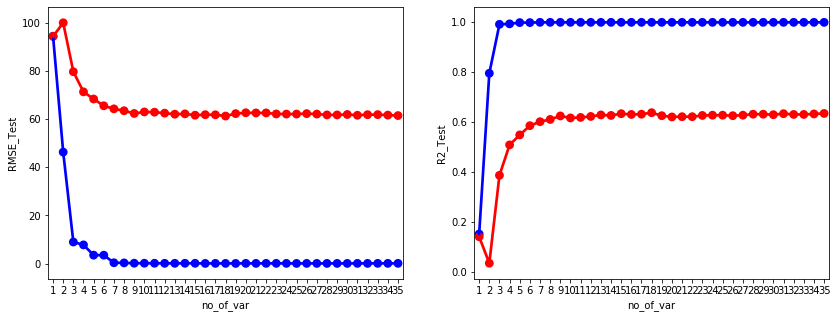

In [56]:
fig, ((ax1, ax2)) = plt.subplots(figsize=(14,5), nrows=1,ncols=2)
sns.pointplot(x='no_of_var', y='RMSE_Train', data=df_kill, ax=ax1, color='blue', label='Train', linestyle='solid')
sns.pointplot(x='no_of_var', y='RMSE_Test', data=df_kill, ax=ax1, color='red', label='Test', linestyle='solid')
sns.pointplot(x='no_of_var', y='R2_Train', data=df_kill, ax=ax2, color='blue', label='Train', linestyle='solid')
sns.pointplot(x='no_of_var', y='R2_Test', data=df_kill, ax=ax2, color='red', label='Test', linestyle='solid')

In [101]:
# train_X.drop(["T1","T9","RH_6","RH_8","T_out","RH_out","Windspeed",'Visibility','WEEKDAY', 'WhatMonth',
#        'WhatDay_0', 'WhatDay_1', 'WhatDay_2', 'WhatDay_3', 'WhatDay_4',
#        'WhatDay_5', 'WhatDay_6'],axis=1 , inplace=True)
# test_X.drop(["T1","T9","RH_6","RH_8","T_out","RH_out","Windspeed",'Visibility','WEEKDAY', 'WhatMonth',
#        'WhatDay_0', 'WhatDay_1', 'WhatDay_2', 'WhatDay_3', 'WhatDay_4',
#        'WhatDay_5', 'WhatDay_6'], axis=1, inplace=True)
train_X = train_X[["WhatHour","Press_mm_hg","T3","RH_8","RH_3","T8","T6","RH_2","Tdewpoint","T4","RH_5","RH_9"]]
test_X = test_X[["WhatHour","Press_mm_hg","T3","RH_8","RH_3","T8","T6","RH_2","Tdewpoint","T4","RH_5","RH_9"]]

In [46]:
#基于树模型的特征选择
# 可以采用随机森林的算法，通过树的模型训练可以计算每一个属性的重要性。重要性的值可以帮助我们选择出重要的特征。
# sklearn.ensemble模块包含了两种基于随机决策树的平均算法：RandomForest算法和Extra-Trees算法。这里使用Extra-Trees算法。
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor#导入ExtraTrees
model = RandomForestRegressor() #设置ExtraTrees
model.fit(train_X.values, train_y.values.ravel())
model.feature_importances_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.03654848, 0.03952719, 0.05333812, 0.04051709, 0.04867328,
       0.03500742, 0.03720752, 0.04565708, 0.0621109 , 0.05284402,
       0.06158895, 0.03988155, 0.04438399, 0.04416165, 0.03984451,
       0.0473226 , 0.04225182, 0.0302708 , 0.06586799, 0.05108534,
       0.032402  , 0.04950769])

In [47]:
a = np.asarray(train_X.columns).reshape(-1,1)#train_X.columns.values
b = model.feature_importances_.reshape(-1,1)
#将array数组组合起来
data_array = np.concatenate((a, b), axis=1)
#将array数组转换成DataFrame的形式
data_frame = pd.DataFrame(data_array,index=None,columns = ['unselected features','feature_importances_'])
data_frame

unselected features feature_importances_
0                   T1            0.0365485
1                   T2            0.0395272
2                   T3            0.0533381
3                   T4            0.0405171
4                   T5            0.0486733
5                   T6            0.0350074
6                   T7            0.0372075
7                   T8            0.0456571
8                 RH_1            0.0621109
9                 RH_2             0.052844
10                RH_3             0.061589
11                RH_4            0.0398816
12                RH_5             0.044384
13                RH_6            0.0441617
14                RH_7            0.0398445
15                RH_8            0.0473226
16                RH_9            0.0422518
17           Tdewpoint            0.0302708
18              RH_out             0.065868
19         Press_mm_hg            0.0510853
20           Windspeed             0.032402
21              lights            0.0495077

In [162]:
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression#套索回归和弹性网络
from sklearn.kernel_ridge import KernelRidge#核岭回归
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor#随机森林回归，极端随机森林回归，梯度线性回归
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
#就经验值而言，通常会得到好的结果，但需要注意，这些值通常不是最优的，并且会浪费RAM内存。最好的参数应通过cross-validation给出
models = [
#            ['RandomForest ',RandomForestRegressor(n_estimators=100, max_features=20, n_jobs=-1,max_depth=None)],#好的缺省值是max_features=n_features；
#            ['ExtraTreeRegressor ',ExtraTreesRegressor(n_estimators=100, max_features=20, n_jobs=-1,max_depth=None)],
#            ['GradientBoostingRegressor',GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)],
#            ['lasso',Lasso(alpha=0.0005, random_state=1)],
#            ['ElasticNet',ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)],
#            ['KernelRidge',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)],
#            ['XGBRegressor',xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.8, n_estimators=1000,
#                              reg_alpha=0.5, reg_lambda=0.8,
#                              subsample=0.5, silent=1,
#                              random_state =7, nthread = -1)],
#            ['LGBMRegressor',lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=1000,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)],
#            ['SVR',SVR(kernel='rbf',C=10.0,epsilon=0.2)]
           ['RandomForest ',RandomForestRegressor(n_jobs=-1)],
           ['ExtraTreeRegressor ',ExtraTreesRegressor(n_jobs=-1)],
           ['GradientBoostingRegressor',GradientBoostingRegressor()],
           ['lasso',Lasso()],
           ['ElasticNet',ElasticNet()],
           ['KernelRidge',KernelRidge()],
           ['XGBRegressor',xgb.XGBRegressor(n_jobs=-1)],
           ['LGBMRegressor',lgb.LGBMRegressor(n_jobs=-1)],
           ['SVR',SVR()],
           ['linreg',LinearRegression(n_jobs=-1)]
]

In [163]:
# 把所有的模型都跑一遍看看效果
import time
from math import sqrt

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78#这里直接对random_state参数进行修改
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y.values.ravel())#用训练集开始训练模型
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    #用训练好的模型对数据进行评估
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))#决定系数（拟合优度）1代表最好
    curr_model_data["Train_RMSE_Score"] = np.sqrt(metrics.mean_squared_error(train_y,curr_model.predict(train_X)))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))#均方差
    curr_model_data["Test_RMSE_Score"] = np.sqrt(metrics.mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [164]:
model_data

[{'Name': 'LGBMRegressor',
  'Train_Time': 0.188215970993042,
  'Train_R2_Score': 0.6247558384657269,
  'Train_RMSE_Score': 62.8895725170927,
  'Test_R2_Score': 0.4375194413909482,
  'Test_RMSE_Score': 76.45914373026211},
 {'Name': 'SVR',
  'Train_Time': 8.814470767974854,
  'Train_R2_Score': 0.016687396023683077,
  'Train_RMSE_Score': 101.80461685825,
  'Test_R2_Score': 0.009285843449964304,
  'Test_RMSE_Score': 101.47284953532215},
 {'Name': 'linreg',
  'Train_Time': 0.003859996795654297,
  'Train_R2_Score': 0.09721538931293117,
  'Train_RMSE_Score': 97.54696113923775,
  'Test_R2_Score': 0.0922148296339842,
  'Test_RMSE_Score': 97.13309202835946}]

In [61]:
df = pd.DataFrame(model_data)
df

Name  Train_Time  Train_R2_Score  Train_RMSE_Score  \
0              RandomForest     0.420799        0.914999         29.931879   
1        ExtraTreeRegressor     0.212597        0.999997          0.169576   
2  GradientBoostingRegressor    0.946365        0.316420         84.882130   
3                      lasso    0.027350        0.092678         97.791806   
4                 ElasticNet    0.011883        0.064886         99.278193   
5                KernelRidge   26.753566       -0.805134        137.935602   
6               XGBRegressor    1.335686        0.311343         85.196757   
7              LGBMRegressor    0.238193        0.624756         62.889573   
8                        SVR    9.552397        0.016687        101.804617   
9                     linreg    0.015880        0.097215         97.546961   

   Test_R2_Score  Test_RMSE_Score  
0       0.489184        72.863177  
1       0.576744        66.325032  
2       0.246971        88.467044  
3       0.088598        97.326421  
4       0.063579        98.653202  
5      -0.838974       138.249449  
6       0.252765        88.126038  
7       0.437519        76.459144  
8       0.009286       101.472850  
9       0.092215        97.133092

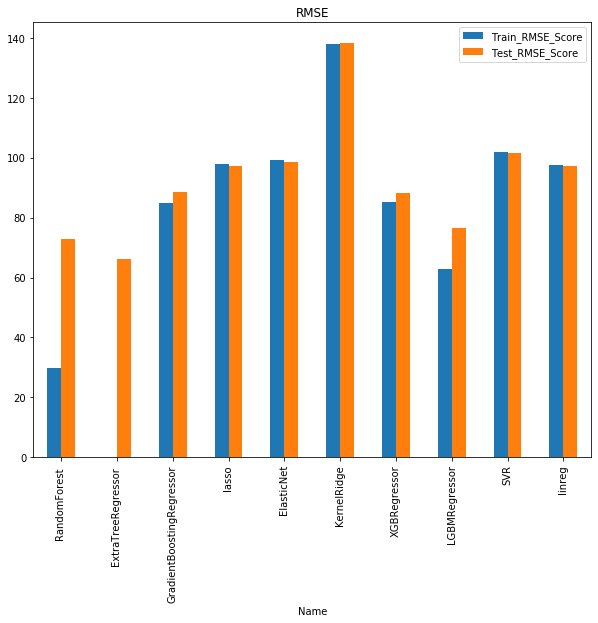

In [62]:
df.plot(x="Name", y=['Train_RMSE_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'RMSE' , figsize= (10,8)) ;

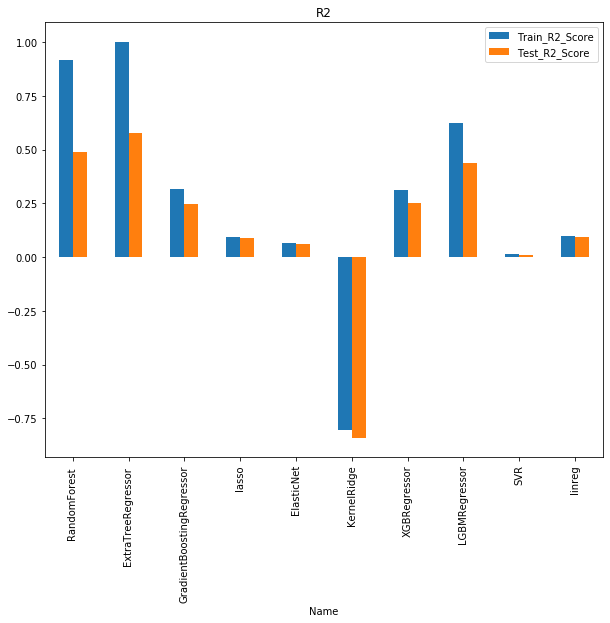

In [63]:
df.plot(x="Name", y=[ 'Train_R2_Score','Test_R2_Score'  ], kind="bar" , title = 'R2' , figsize= (10,8)) ;

## lgb默认参数训练结果

In [209]:
import lightgbm as lgb
reg = lgb.LGBMRegressor(n_jobs=-1)
reg.fit(train_X, train_y.values.ravel())
np.sqrt(metrics.mean_squared_error(reg.predict(test_X),test_y))


76.45914373026211

In [210]:
reg

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## 网格搜索

In [203]:
from sklearn.model_selection import GridSearchCV,cross_val_score
#暴力搜索所有参数组合
param_grid = [{
#               'max_depth': [20, 40, 80],
#               'n_estimators' : [300, 400, 500],
#               'max_features': ["auto", "sqrt", "log2"]
              'max_depth': [80],
              'n_estimators' : [400],
              'max_features': ["sqrt"]
    
         'max_depth": [1,3,5,7],
         "num_trees": hp.randint("num_trees", 300),
         'learning_rate': [0.1,0.2,0.3],
         "bagging_fraction": [0.1,0.3,0.5],
         "num_leaves": hp.randint("num_leaves", 6),
    
    'bagging_fraction': 0.8, 'learning_rate': 0.05756211102291279, 'max_depth': 13, 'num_leaves': 25, 'num_trees': 443}
    
            }]
reg = lgb.LGBMRegressor(n_jobs=-1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y.values.ravel())
# Scores = cross_val_score(grid_search, train_X, train_y, scoring='r2', cv=5, n_jobs = -1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [80], 'max_features': ['sqrt'],
                          'n_estimators': [400]}],
             pre_dispatch='2*n_jobs', refit=True, 

In [204]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 400}

In [205]:
grid_search.best_estimator_.score(test_X,test_y)

0.5258940945940955

In [206]:
np.sqrt(metrics.mean_squared_error(grid_search.best_estimator_.predict(test_X),test_y))

70.1961598616242

## 贝叶斯优化

In [195]:
data = pd.read_csv("./energydata_complete.csv")
# 增加特征值看是否是工作日
data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(int)
# There are 5472 weekend recordings 
data['WEEKDAY'].value_counts()
# 进一步处理，由于日期在以后的日子里不可重复，作为feature并不合适，而可以用星期数来代替
data['date']=pd.to_datetime(data['date'])
data['WhatDay'] = data['date'].map(lambda x: x.strftime('%w')) # 将日期转换为星期数
data['WhatMonth'] = data['date'].map(lambda x: x.strftime('%m')).astype(int) # 将日期转换为月份
# 增加一个小时数特征
data['WhatHour']  = data['date'].map(lambda x: x.strftime('%H')).astype(int)
data = pd.get_dummies(data)
# 对所有特征值做分类
col_time=["date"]
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_weekday = [ 'WEEKDAY', 'WhatMonth',
       'WhatDay_0', 'WhatDay_1', 'WhatDay_2', 'WhatDay_3', 'WhatDay_4',
       'WhatDay_5', 'WhatDay_6','WhatHour']
col_target = ["Appliances"]
feature_vars = data[col_temp + col_hum + col_weather + col_light  + col_weekday]#没有了时间和负荷数据
target_vars = data[col_target]
X = data[feature_vars.columns]
y = data[target_vars.columns]
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()#对数据进行标准化处理
mm = MinMaxScaler(feature_range=(0,1))#对数据进行归一化处理
# 归一化： 适合小数据，比较准确的数据集。受异常点的影响大，稳定性(robust-鲁棒性)比较弱
# 标准化： 适合嘈杂大数据场景。受异常点的影响小，稳定性比较强
#这里只对特征值做标准化，我个人觉得目标值不需要做
X[X.columns] = sc.fit_transform(X)
X = X[["WhatHour","Press_mm_hg","T3","RH_8","RH_3","T8","T6","RH_2","Tdewpoint","T4","RH_5","RH_9"]]



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
import lightgbm as lgb
x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, y, test_size=0.10, random_state=100)

x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)

train_data = lgb.Dataset(data=train_X,label=train_y)
test_data = lgb.Dataset(data=test_X,label=test_y)

In [197]:
from hyperopt import fmin, tpe, hp, partial

# 自定义hyperopt的参数空间
space = {"max_depth": hp.randint("max_depth", 15),
         "num_trees": hp.randint("num_trees", 300),
         'learning_rate': hp.uniform('learning_rate', 1e-3, 5e-1),
         "bagging_fraction": hp.randint("bagging_fraction", 5),
         "num_leaves": hp.randint("num_leaves", 6),
         }

def argsDict_tranform(argsDict, isPrint=False):
    argsDict["max_depth"] = argsDict["max_depth"] + 5
    argsDict['num_trees'] = argsDict['num_trees'] + 150
    argsDict["learning_rate"] = argsDict["learning_rate"] * 0.02 + 0.05
    argsDict["bagging_fraction"] = argsDict["bagging_fraction"] * 0.1 + 0.5
    argsDict["num_leaves"] = argsDict["num_leaves"] * 3 + 10
    if isPrint:
        print(argsDict)
    else:
        pass

    return argsDict

In [198]:
from sklearn.metrics import mean_squared_error

def lightgbm_factory(argsDict):
    argsDict = argsDict_tranform(argsDict)

    params = {'nthread': -1,  # 进程数
              'max_depth': argsDict['max_depth'],  # 最大深度
              'num_trees': argsDict['num_trees'],  # 树的数量
              'eta': argsDict['learning_rate'],  # 学习率
              'bagging_fraction': argsDict['bagging_fraction'],  # 采样数
              'num_leaves': argsDict['num_leaves'],  # 终点节点最小样本占比的和
              'objective': 'regression',
              'feature_fraction': 0.7,  # 样本列采样
              'lambda_l1': 0,  # L1 正则化
              'lambda_l2': 0,  # L2 正则化
              'bagging_seed': 100,  # 随机种子,light中默认为100
              }
    params['metric'] = ['rmse']

    model_lgb = lgb.train(params, train_data, num_boost_round=300, valid_sets=[test_data],early_stopping_rounds=100)

    return get_tranformer_score(model_lgb)

def get_tranformer_score(tranformer):

    model = tranformer
    prediction = model.predict(x_predict, num_iteration=model.best_iteration)

    return mean_squared_error(y_predict, prediction)

In [199]:
algo = partial(tpe.suggest, n_startup_jobs=1)
best = fmin(lightgbm_factory, space, algo=algo, max_evals=20, pass_expr_memo_ctrl=None)




[1]	valid_0's rmse: 100.876                           
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 99.8597                           
[3]	valid_0's rmse: 98.7643                           
[4]	valid_0's rmse: 98.2551                           
[5]	valid_0's rmse: 97.3753                           
[6]	valid_0's rmse: 96.4561                           
[7]	valid_0's rmse: 96.0552                           
[8]	valid_0's rmse: 95.2334                           
[9]	valid_0's rmse: 94.8279                           
[10]	valid_0's rmse: 94.1526                          
[11]	valid_0's rmse: 93.8305                          
[12]	valid_0's rmse: 93.2798                          
[13]	valid_0's rmse: 92.7077                          
[14]	valid_0's rmse: 92.2185                          
[15]	valid_0's rmse: 91.7398                          
[16]	valid_0's rmse: 91.2852                          
[17]	valid_0's rmse: 90.7856                          
[18

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[19]	valid_0's rmse: 89.9958                          
[20]	valid_0's rmse: 89.7168                          
[21]	valid_0's rmse: 89.3277                          
[22]	valid_0's rmse: 89.1006                          
[23]	valid_0's rmse: 88.8645                          
[24]	valid_0's rmse: 88.6211                          
[25]	valid_0's rmse: 88.362                           
[26]	valid_0's rmse: 88.0426                          
[27]	valid_0's rmse: 87.7479                          
[28]	valid_0's rmse: 87.4881                          
[29]	valid_0's rmse: 87.2434                          
[30]	valid_0's rmse: 86.9918                          
[31]	valid_0's rmse: 86.8103                          
[32]	valid_0's rmse: 86.6463                          
[33]	valid_0's rmse: 86.4302                          
[34]	valid_0's rmse: 86.2524                          
[35]	valid_0's rmse: 86.1282                          
[36]	valid_0's rmse: 85.9495                          
[37]	valid

[167]	valid_0's rmse: 77.743                          
[168]	valid_0's rmse: 77.7229                         
[169]	valid_0's rmse: 77.6858                         
[170]	valid_0's rmse: 77.6644                         
[171]	valid_0's rmse: 77.6349                         
[172]	valid_0's rmse: 77.6166                         
[173]	valid_0's rmse: 77.5908                         
[174]	valid_0's rmse: 77.574                          
[175]	valid_0's rmse: 77.5357                         
[176]	valid_0's rmse: 77.5162                         
[177]	valid_0's rmse: 77.4926                         
[178]	valid_0's rmse: 77.4377                         
[179]	valid_0's rmse: 77.4042                         
[180]	valid_0's rmse: 77.3904                         
[181]	valid_0's rmse: 77.3894                         
[182]	valid_0's rmse: 77.3689                         
[183]	valid_0's rmse: 77.3573                         
[184]	valid_0's rmse: 77.3423                         
[185]	vali

[315]	valid_0's rmse: 74.4472                         
[316]	valid_0's rmse: 74.4364                         
[317]	valid_0's rmse: 74.428                          
[318]	valid_0's rmse: 74.408                          
[319]	valid_0's rmse: 74.3928                         
[320]	valid_0's rmse: 74.3707                         
[321]	valid_0's rmse: 74.3595                         
[322]	valid_0's rmse: 74.3462                         
[323]	valid_0's rmse: 74.3278                         
[324]	valid_0's rmse: 74.3085                         
[325]	valid_0's rmse: 74.288                          
[326]	valid_0's rmse: 74.2894                         
[327]	valid_0's rmse: 74.2674                         
[328]	valid_0's rmse: 74.2618                         
[329]	valid_0's rmse: 74.2424                         
[330]	valid_0's rmse: 74.2436                         
[331]	valid_0's rmse: 74.2227                         
[332]	valid_0's rmse: 74.1735                         
[333]	vali

[12]	valid_0's rmse: 93.066                                                     
[13]	valid_0's rmse: 92.4711                                                    
[14]	valid_0's rmse: 91.9709                                                    
[15]	valid_0's rmse: 91.5018                                                    
[16]	valid_0's rmse: 91.0718                                                    
[17]	valid_0's rmse: 90.6331                                                    
[18]	valid_0's rmse: 90.1622                                                    
[19]	valid_0's rmse: 89.7477                                                    
[20]	valid_0's rmse: 89.4402                                                    
[21]	valid_0's rmse: 89.0066                                                    
[22]	valid_0's rmse: 88.8005                                                    
  5%|▌         | 1/20 [00:04<01:18,  4.11s/trial, best loss: 3625.4179843422735]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[23]	valid_0's rmse: 88.6317                                                    
[24]	valid_0's rmse: 88.3763                                                    
[25]	valid_0's rmse: 88.0846                                                    
[26]	valid_0's rmse: 87.8037                                                    
[27]	valid_0's rmse: 87.5765                                                    
[28]	valid_0's rmse: 87.3347                                                    
[29]	valid_0's rmse: 87.0674                                                    
[30]	valid_0's rmse: 86.8626                                                    
[31]	valid_0's rmse: 86.6576                                                    
[32]	valid_0's rmse: 86.4797                                                    
[33]	valid_0's rmse: 86.2938                                                    
[34]	valid_0's rmse: 86.1397                                                    
[35]	valid_0's rmse: 86.0108

[124]	valid_0's rmse: 79.4027                                                   
[125]	valid_0's rmse: 79.3564                                                   
[126]	valid_0's rmse: 79.2917                                                   
[127]	valid_0's rmse: 79.2515                                                   
[128]	valid_0's rmse: 79.2269                                                   
[129]	valid_0's rmse: 79.2154                                                   
[130]	valid_0's rmse: 79.1738                                                   
[131]	valid_0's rmse: 79.1298                                                   
[132]	valid_0's rmse: 79.1                                                      
[133]	valid_0's rmse: 79.0525                                                   
[134]	valid_0's rmse: 79.0328                                                   
[135]	valid_0's rmse: 78.9944                                                   
[136]	valid_0's rmse: 78.938

[225]	valid_0's rmse: 76.686                                                    
[226]	valid_0's rmse: 76.6764                                                   
[227]	valid_0's rmse: 76.6728                                                   
[228]	valid_0's rmse: 76.6717                                                   
[229]	valid_0's rmse: 76.6417                                                   
[230]	valid_0's rmse: 76.61                                                     
[231]	valid_0's rmse: 76.612                                                    
[232]	valid_0's rmse: 76.6073                                                   
[233]	valid_0's rmse: 76.5877                                                   
[234]	valid_0's rmse: 76.5506                                                   
[235]	valid_0's rmse: 76.5406                                                   
[236]	valid_0's rmse: 76.541                                                    
[237]	valid_0's rmse: 76.532

[326]	valid_0's rmse: 74.944                                                    
[327]	valid_0's rmse: 74.9386                                                   
[328]	valid_0's rmse: 74.9282                                                   
[329]	valid_0's rmse: 74.9194                                                   
[330]	valid_0's rmse: 74.88                                                     
[331]	valid_0's rmse: 74.8818                                                   
[332]	valid_0's rmse: 74.8633                                                   
[333]	valid_0's rmse: 74.8499                                                   
[334]	valid_0's rmse: 74.8303                                                   
[335]	valid_0's rmse: 74.829                                                    
[336]	valid_0's rmse: 74.8188                                                   
[337]	valid_0's rmse: 74.8037                                                   
[338]	valid_0's rmse: 74.792

[427]	valid_0's rmse: 73.8732                                                   
[428]	valid_0's rmse: 73.8641                                                   
[429]	valid_0's rmse: 73.8432                                                   
[430]	valid_0's rmse: 73.8377                                                   
[431]	valid_0's rmse: 73.8164                                                   
[432]	valid_0's rmse: 73.7908                                                   
[433]	valid_0's rmse: 73.7851                                                   
[434]	valid_0's rmse: 73.8026                                                   
[435]	valid_0's rmse: 73.8024                                                   
[436]	valid_0's rmse: 73.778                                                    
[437]	valid_0's rmse: 73.7663                                                   
[438]	valid_0's rmse: 73.7729                                                   
[439]	valid_0's rmse: 73.746

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[20]	valid_0's rmse: 90.6051                                                    
[21]	valid_0's rmse: 90.2257                                                    
[22]	valid_0's rmse: 90.0205                                                    
[23]	valid_0's rmse: 89.7765                                                    
[24]	valid_0's rmse: 89.5349                                                    
[25]	valid_0's rmse: 89.2675                                                    
[26]	valid_0's rmse: 88.9597                                                    
[27]	valid_0's rmse: 88.7387                                                    
[28]	valid_0's rmse: 88.5119                                                    
[29]	valid_0's rmse: 88.2825                                                    
[30]	valid_0's rmse: 88.0564                                                    
[31]	valid_0's rmse: 87.8387                                                    
[32]	valid_0's rmse: 87.6676

[121]	valid_0's rmse: 80.2076                                                   
[122]	valid_0's rmse: 80.1923                                                   
[123]	valid_0's rmse: 80.1735                                                   
[124]	valid_0's rmse: 80.1339                                                   
[125]	valid_0's rmse: 80.1209                                                   
[126]	valid_0's rmse: 80.0915                                                   
[127]	valid_0's rmse: 80.085                                                    
[128]	valid_0's rmse: 79.9917                                                   
[129]	valid_0's rmse: 79.9413                                                   
[130]	valid_0's rmse: 79.8999                                                   
[131]	valid_0's rmse: 79.8772                                                   
[132]	valid_0's rmse: 79.8509                                                   
[133]	valid_0's rmse: 79.821

[222]	valid_0's rmse: 77.3034                                                   
[223]	valid_0's rmse: 77.2625                                                   
[224]	valid_0's rmse: 77.233                                                    
[225]	valid_0's rmse: 77.2221                                                   
[226]	valid_0's rmse: 77.1874                                                   
[227]	valid_0's rmse: 77.1717                                                   
[228]	valid_0's rmse: 77.1527                                                   
[229]	valid_0's rmse: 77.1261                                                   
[230]	valid_0's rmse: 77.1306                                                   
[231]	valid_0's rmse: 77.1164                                                   
[232]	valid_0's rmse: 77.0993                                                   
[233]	valid_0's rmse: 77.0526                                                   
[234]	valid_0's rmse: 77.042

[323]	valid_0's rmse: 75.4168                                                   
[324]	valid_0's rmse: 75.4037                                                   
[325]	valid_0's rmse: 75.3874                                                   
[326]	valid_0's rmse: 75.3746                                                   
[327]	valid_0's rmse: 75.3649                                                   
[328]	valid_0's rmse: 75.3343                                                   
[329]	valid_0's rmse: 75.3112                                                   
[330]	valid_0's rmse: 75.2998                                                   
[331]	valid_0's rmse: 75.3037                                                   
[332]	valid_0's rmse: 75.2941                                                   
[333]	valid_0's rmse: 75.2499                                                   
[334]	valid_0's rmse: 75.2059                                                   
[335]	valid_0's rmse: 75.175

[424]	valid_0's rmse: 74.1427                                                   
[425]	valid_0's rmse: 74.1318                                                   
[426]	valid_0's rmse: 74.1234                                                   
[427]	valid_0's rmse: 74.0938                                                   
[428]	valid_0's rmse: 74.0755                                                   
[429]	valid_0's rmse: 74.0666                                                   
[430]	valid_0's rmse: 74.0554                                                   
[431]	valid_0's rmse: 74.0457                                                   
[432]	valid_0's rmse: 74.0348                                                   
[433]	valid_0's rmse: 74.0297                                                   
[434]	valid_0's rmse: 74.0186                                                   
[435]	valid_0's rmse: 73.9987                                                   
[436]	valid_0's rmse: 74.000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[27]	valid_0's rmse: 89.3456                                                    
[28]	valid_0's rmse: 89.1959                                                    
[29]	valid_0's rmse: 88.9292                                                    
[30]	valid_0's rmse: 88.7565                                                    
[31]	valid_0's rmse: 88.6245                                                    
[32]	valid_0's rmse: 88.4618                                                    
[33]	valid_0's rmse: 88.277                                                     
[34]	valid_0's rmse: 88.1221                                                    
[35]	valid_0's rmse: 87.9973                                                    
[36]	valid_0's rmse: 87.8536                                                    
[37]	valid_0's rmse: 87.6915                                                    
[38]	valid_0's rmse: 87.5189                                                    
[39]	valid_0's rmse: 87.3636

[128]	valid_0's rmse: 82.1865                                                   
[129]	valid_0's rmse: 82.1755                                                   
[130]	valid_0's rmse: 82.1427                                                   
[131]	valid_0's rmse: 82.1034                                                   
[132]	valid_0's rmse: 82.0694                                                   
[133]	valid_0's rmse: 82.0757                                                   
[134]	valid_0's rmse: 82.042                                                    
[135]	valid_0's rmse: 82.0107                                                   
[136]	valid_0's rmse: 81.9884                                                   
[137]	valid_0's rmse: 81.9746                                                   
[138]	valid_0's rmse: 81.9418                                                   
[139]	valid_0's rmse: 81.9107                                                   
[140]	valid_0's rmse: 81.886

[229]	valid_0's rmse: 79.806                                                    
[230]	valid_0's rmse: 79.787                                                    
[231]	valid_0's rmse: 79.7728                                                   
[232]	valid_0's rmse: 79.746                                                    
[233]	valid_0's rmse: 79.737                                                    
[234]	valid_0's rmse: 79.726                                                    
[235]	valid_0's rmse: 79.7177                                                   
[236]	valid_0's rmse: 79.7034                                                   
[237]	valid_0's rmse: 79.6834                                                   
[238]	valid_0's rmse: 79.6458                                                   
[239]	valid_0's rmse: 79.6368                                                   
[240]	valid_0's rmse: 79.6097                                                   
[241]	valid_0's rmse: 79.584

[330]	valid_0's rmse: 78.156                                                    
[331]	valid_0's rmse: 78.1431                                                   
Did not meet early stopping. Best iteration is:                                 
[331]	valid_0's rmse: 78.1431
[1]	valid_0's rmse: 100.996                                                     
Training until validation scores don't improve for 100 rounds                   
[2]	valid_0's rmse: 100.158                                                     
[3]	valid_0's rmse: 99.3121                                                     
[4]	valid_0's rmse: 99.0706                                                     
[5]	valid_0's rmse: 98.3691                                                     
[6]	valid_0's rmse: 97.6024                                                     
[7]	valid_0's rmse: 97.4135                                                     
[8]	valid_0's rmse: 96.8308                                                    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[28]	valid_0's rmse: 90.6676
[29]	valid_0's rmse: 90.4937                                                    
[30]	valid_0's rmse: 90.3156                                                    
[31]	valid_0's rmse: 90.173                                                     
[32]	valid_0's rmse: 90.0476                                                    
[33]	valid_0's rmse: 89.8488                                                    
[34]	valid_0's rmse: 89.7098                                                    
[35]	valid_0's rmse: 89.6369                                                    
[36]	valid_0's rmse: 89.4813                                                    
[37]	valid_0's rmse: 89.3261                                                    
[38]	valid_0's rmse: 89.2281                                                    
[39]	valid_0's rmse: 89.0372                                                    
[40]	valid_0's rmse: 88.929                                                     

[129]	valid_0's rmse: 83.4614                                                   
[130]	valid_0's rmse: 83.4133                                                   
[131]	valid_0's rmse: 83.3865                                                   
[132]	valid_0's rmse: 83.3587                                                   
[133]	valid_0's rmse: 83.3362                                                   
[134]	valid_0's rmse: 83.2967                                                   
[135]	valid_0's rmse: 83.2569                                                   
[136]	valid_0's rmse: 83.2301                                                   
[137]	valid_0's rmse: 83.2049                                                   
[138]	valid_0's rmse: 83.1565                                                   
[139]	valid_0's rmse: 83.1376                                                   
[140]	valid_0's rmse: 83.1182                                                   
[141]	valid_0's rmse: 83.120

[230]	valid_0's rmse: 80.8179                                                   
[231]	valid_0's rmse: 80.7838                                                   
[232]	valid_0's rmse: 80.7587                                                   
[233]	valid_0's rmse: 80.7416                                                   
[234]	valid_0's rmse: 80.7344                                                   
[235]	valid_0's rmse: 80.7237                                                   
[236]	valid_0's rmse: 80.7114                                                   
[237]	valid_0's rmse: 80.7059                                                   
[238]	valid_0's rmse: 80.6818                                                   
[239]	valid_0's rmse: 80.6578                                                   
[240]	valid_0's rmse: 80.6361                                                   
[241]	valid_0's rmse: 80.6131                                                   
[242]	valid_0's rmse: 80.614

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[27]	valid_0's rmse: 90.0616                                                    
[28]	valid_0's rmse: 89.8801                                                    
[29]	valid_0's rmse: 89.6921                                                    
[30]	valid_0's rmse: 89.4986                                                    
[31]	valid_0's rmse: 89.3344                                                    
[32]	valid_0's rmse: 89.1875                                                    
[33]	valid_0's rmse: 89.0162                                                    
[34]	valid_0's rmse: 88.8421                                                    
[35]	valid_0's rmse: 88.7647                                                    
[36]	valid_0's rmse: 88.5847                                                    
[37]	valid_0's rmse: 88.4752                                                    
[38]	valid_0's rmse: 88.3156                                                    
[39]	valid_0's rmse: 88.1728

[128]	valid_0's rmse: 82.3551                                                   
[129]	valid_0's rmse: 82.3303                                                   
[130]	valid_0's rmse: 82.2744                                                   
[131]	valid_0's rmse: 82.2356                                                   
[132]	valid_0's rmse: 82.2327                                                   
[133]	valid_0's rmse: 82.1935                                                   
[134]	valid_0's rmse: 82.174                                                    
[135]	valid_0's rmse: 82.0956                                                   
[136]	valid_0's rmse: 82.0393                                                   
[137]	valid_0's rmse: 81.9915                                                   
[138]	valid_0's rmse: 81.9744                                                   
[139]	valid_0's rmse: 81.9498                                                   
[140]	valid_0's rmse: 81.909

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[23]	valid_0's rmse: 89.8758                                                    
[24]	valid_0's rmse: 89.6247                                                    
[25]	valid_0's rmse: 89.3664                                                    
[26]	valid_0's rmse: 89.096                                                     
[27]	valid_0's rmse: 88.8435                                                    
[28]	valid_0's rmse: 88.6404                                                    
[29]	valid_0's rmse: 88.4349                                                    
[30]	valid_0's rmse: 88.203                                                     
[31]	valid_0's rmse: 88.0067                                                    
[32]	valid_0's rmse: 87.8337                                                    
[33]	valid_0's rmse: 87.6202                                                    
[34]	valid_0's rmse: 87.4957                                                    
[35]	valid_0's rmse: 87.3323

[124]	valid_0's rmse: 80.7693                                                   
[125]	valid_0's rmse: 80.7058                                                   
[126]	valid_0's rmse: 80.6596                                                   
[127]	valid_0's rmse: 80.6022                                                   
[128]	valid_0's rmse: 80.5466                                                   
[129]	valid_0's rmse: 80.5059                                                   
[130]	valid_0's rmse: 80.4715                                                   
[131]	valid_0's rmse: 80.4588                                                   
[132]	valid_0's rmse: 80.4354                                                   
[133]	valid_0's rmse: 80.4223                                                   
[134]	valid_0's rmse: 80.3688                                                   
[135]	valid_0's rmse: 80.3433                                                   
[136]	valid_0's rmse: 80.284

[225]	valid_0's rmse: 77.9841                                                   
[226]	valid_0's rmse: 77.9706                                                   
[227]	valid_0's rmse: 77.9523                                                   
[228]	valid_0's rmse: 77.9486                                                   
[229]	valid_0's rmse: 77.9363                                                   
[230]	valid_0's rmse: 77.9125                                                   
[231]	valid_0's rmse: 77.8878                                                   
[232]	valid_0's rmse: 77.8684                                                   
[233]	valid_0's rmse: 77.8564                                                   
[234]	valid_0's rmse: 77.8515                                                   
[235]	valid_0's rmse: 77.8273                                                   
[236]	valid_0's rmse: 77.8123                                                   
[237]	valid_0's rmse: 77.780

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[33]	valid_0's rmse: 91.295
[34]	valid_0's rmse: 91.1705                                                    
[35]	valid_0's rmse: 91.0563                                                    
[36]	valid_0's rmse: 90.971                                                     
[37]	valid_0's rmse: 90.8757                                                    
[38]	valid_0's rmse: 90.724                                                     
[39]	valid_0's rmse: 90.5977                                                    
[40]	valid_0's rmse: 90.4519                                                    
[41]	valid_0's rmse: 90.3249                                                    
[42]	valid_0's rmse: 90.2104                                                    
[43]	valid_0's rmse: 90.0691                                                    
[44]	valid_0's rmse: 89.9821                                                    
[45]	valid_0's rmse: 89.8954                                                    


[134]	valid_0's rmse: 85.7155                                                   
[135]	valid_0's rmse: 85.6998                                                   
[136]	valid_0's rmse: 85.6665                                                   
[137]	valid_0's rmse: 85.6489                                                   
[138]	valid_0's rmse: 85.6412                                                   
[139]	valid_0's rmse: 85.5966                                                   
[140]	valid_0's rmse: 85.5722                                                   
[141]	valid_0's rmse: 85.5574                                                   
[142]	valid_0's rmse: 85.5449                                                   
[143]	valid_0's rmse: 85.527                                                    
[144]	valid_0's rmse: 85.5199                                                   
[145]	valid_0's rmse: 85.4865                                                   
[146]	valid_0's rmse: 85.449

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[22]	valid_0's rmse: 89.1221                                                    
[23]	valid_0's rmse: 88.8861                                                    
[24]	valid_0's rmse: 88.6284                                                    
[25]	valid_0's rmse: 88.3561                                                    
[26]	valid_0's rmse: 88.0345                                                    
[27]	valid_0's rmse: 87.7285                                                    
[28]	valid_0's rmse: 87.4689                                                    
[29]	valid_0's rmse: 87.2117                                                    
[30]	valid_0's rmse: 86.9736                                                    
[31]	valid_0's rmse: 86.7672                                                    
[32]	valid_0's rmse: 86.6231                                                    
[33]	valid_0's rmse: 86.3997                                                    
[34]	valid_0's rmse: 86.2368

[123]	valid_0's rmse: 79.5446                                                   
[124]	valid_0's rmse: 79.4799                                                   
[125]	valid_0's rmse: 79.4564                                                   
[126]	valid_0's rmse: 79.4471                                                   
[127]	valid_0's rmse: 79.4206                                                   
[128]	valid_0's rmse: 79.3492                                                   
[129]	valid_0's rmse: 79.3217                                                   
[130]	valid_0's rmse: 79.287                                                    
[131]	valid_0's rmse: 79.2404                                                   
[132]	valid_0's rmse: 79.1826                                                   
[133]	valid_0's rmse: 79.0949                                                   
[134]	valid_0's rmse: 79.0668                                                   
[135]	valid_0's rmse: 79.052

[224]	valid_0's rmse: 76.5763                                                   
[225]	valid_0's rmse: 76.5656                                                   
[226]	valid_0's rmse: 76.5561                                                   
[227]	valid_0's rmse: 76.5349                                                   
[228]	valid_0's rmse: 76.5292                                                   
[229]	valid_0's rmse: 76.5257                                                   
[230]	valid_0's rmse: 76.5176                                                   
[231]	valid_0's rmse: 76.4857                                                   
[232]	valid_0's rmse: 76.4325                                                   
[233]	valid_0's rmse: 76.4192                                                   
[234]	valid_0's rmse: 76.4129                                                   
[235]	valid_0's rmse: 76.393                                                    
[236]	valid_0's rmse: 76.383

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[28]	valid_0's rmse: 90.1535                                                    
[29]	valid_0's rmse: 89.9339                                                    
[30]	valid_0's rmse: 89.7126                                                    
[31]	valid_0's rmse: 89.4719                                                    
[32]	valid_0's rmse: 89.3258                                                    
[33]	valid_0's rmse: 89.13                                                      
[34]	valid_0's rmse: 89.0014                                                    
[35]	valid_0's rmse: 88.8894                                                    
[36]	valid_0's rmse: 88.7085                                                    
[37]	valid_0's rmse: 88.5588                                                    
[38]	valid_0's rmse: 88.4299                                                    
[39]	valid_0's rmse: 88.2484                                                    
[40]	valid_0's rmse: 88.0926

[129]	valid_0's rmse: 82.9362                                                   
[130]	valid_0's rmse: 82.8842                                                   
[131]	valid_0's rmse: 82.8749                                                   
[132]	valid_0's rmse: 82.8462                                                   
[133]	valid_0's rmse: 82.8288                                                   
[134]	valid_0's rmse: 82.782                                                    
[135]	valid_0's rmse: 82.758                                                    
[136]	valid_0's rmse: 82.7295                                                   
[137]	valid_0's rmse: 82.7055                                                   
[138]	valid_0's rmse: 82.672                                                    
[139]	valid_0's rmse: 82.6469                                                   
[140]	valid_0's rmse: 82.6458                                                   
[141]	valid_0's rmse: 82.617

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[21]	valid_0's rmse: 89.8512
[22]	valid_0's rmse: 89.6896                                                     
[23]	valid_0's rmse: 89.4858                                                     
[24]	valid_0's rmse: 89.2376                                                     
[25]	valid_0's rmse: 88.9692                                                     
[26]	valid_0's rmse: 88.6472                                                     
[27]	valid_0's rmse: 88.4209                                                     
[28]	valid_0's rmse: 88.1889                                                     
[29]	valid_0's rmse: 87.9707                                                     
[30]	valid_0's rmse: 87.7309                                                     
[31]	valid_0's rmse: 87.5106                                                     
[32]	valid_0's rmse: 87.3377                                                     
[33]	valid_0's rmse: 87.1199                                         

[121]	valid_0's rmse: 80.2204                                                    
[122]	valid_0's rmse: 80.1904                                                    
[123]	valid_0's rmse: 80.1469                                                    
[124]	valid_0's rmse: 80.1503                                                    
[125]	valid_0's rmse: 80.1109                                                    
[126]	valid_0's rmse: 80.0628                                                    
[127]	valid_0's rmse: 80.0092                                                    
[128]	valid_0's rmse: 79.9706                                                    
[129]	valid_0's rmse: 79.9285                                                    
[130]	valid_0's rmse: 79.8563                                                    
[131]	valid_0's rmse: 79.8006                                                    
[132]	valid_0's rmse: 79.7903                                                    
[133]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[31]	valid_0's rmse: 90.8037                                                     
[32]	valid_0's rmse: 90.7044                                                     
[33]	valid_0's rmse: 90.5289                                                     
[34]	valid_0's rmse: 90.4081                                                     
[35]	valid_0's rmse: 90.324                                                      
[36]	valid_0's rmse: 90.2101                                                     
[37]	valid_0's rmse: 90.0712                                                     
[38]	valid_0's rmse: 89.9623                                                     
[39]	valid_0's rmse: 89.8521                                                     
[40]	valid_0's rmse: 89.7059                                                     
[41]	valid_0's rmse: 89.5903                                                     
[42]	valid_0's rmse: 89.4475                                                     
[43]	valid_0's r

[130]	valid_0's rmse: 85.1972                                                    
[131]	valid_0's rmse: 85.1449                                                    
[132]	valid_0's rmse: 85.128                                                     
[133]	valid_0's rmse: 85.1012                                                    
[134]	valid_0's rmse: 85.0767                                                    
[135]	valid_0's rmse: 85.0405                                                    
[136]	valid_0's rmse: 85.0177                                                    
[137]	valid_0's rmse: 85.0058                                                    
[138]	valid_0's rmse: 84.9781                                                    
[139]	valid_0's rmse: 84.9277                                                    
[140]	valid_0's rmse: 84.8964                                                    
[141]	valid_0's rmse: 84.8884                                                    
[142]	valid_0's 

[229]	valid_0's rmse: 82.4958                                                    
[230]	valid_0's rmse: 82.4845                                                    
[231]	valid_0's rmse: 82.465                                                     
[232]	valid_0's rmse: 82.4475                                                    
[233]	valid_0's rmse: 82.4439                                                    
[234]	valid_0's rmse: 82.4356                                                    
[235]	valid_0's rmse: 82.4029                                                    
[236]	valid_0's rmse: 82.3837                                                    
[237]	valid_0's rmse: 82.3553                                                    
[238]	valid_0's rmse: 82.3099                                                    
[239]	valid_0's rmse: 82.2974                                                    
[240]	valid_0's rmse: 82.2921                                                    
[241]	valid_0's 

[328]	valid_0's rmse: 80.7587                                                    
[329]	valid_0's rmse: 80.7155                                                    
[330]	valid_0's rmse: 80.7234                                                    
[331]	valid_0's rmse: 80.7097                                                    
[332]	valid_0's rmse: 80.7033                                                    
[333]	valid_0's rmse: 80.6965                                                    
[334]	valid_0's rmse: 80.6818                                                    
[335]	valid_0's rmse: 80.6613                                                    
[336]	valid_0's rmse: 80.6487                                                    
[337]	valid_0's rmse: 80.6411                                                    
[338]	valid_0's rmse: 80.6294                                                    
[339]	valid_0's rmse: 80.6148                                                    
[340]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[21]	valid_0's rmse: 90.4403                                                     
[22]	valid_0's rmse: 90.2753                                                     
[23]	valid_0's rmse: 90.0821                                                     
[24]	valid_0's rmse: 89.845                                                      
[25]	valid_0's rmse: 89.5563                                                     
[26]	valid_0's rmse: 89.2853                                                     
[27]	valid_0's rmse: 89.0745                                                     
[28]	valid_0's rmse: 88.8892                                                     
[29]	valid_0's rmse: 88.689                                                      
[30]	valid_0's rmse: 88.4812                                                     
[31]	valid_0's rmse: 88.3084                                                     
[32]	valid_0's rmse: 88.17                                                       
[33]	valid_0's r

[120]	valid_0's rmse: 81.5914                                                    
[121]	valid_0's rmse: 81.5679                                                    
[122]	valid_0's rmse: 81.5454                                                    
[123]	valid_0's rmse: 81.4959                                                    
[124]	valid_0's rmse: 81.4821                                                    
[125]	valid_0's rmse: 81.4575                                                    
[126]	valid_0's rmse: 81.4349                                                    
[127]	valid_0's rmse: 81.4022                                                    
[128]	valid_0's rmse: 81.3869                                                    
[129]	valid_0's rmse: 81.3426                                                    
[130]	valid_0's rmse: 81.3146                                                    
[131]	valid_0's rmse: 81.3058                                                    
[132]	valid_0's 

[219]	valid_0's rmse: 78.9169                                                    
[220]	valid_0's rmse: 78.8935                                                    
[221]	valid_0's rmse: 78.8739                                                    
[222]	valid_0's rmse: 78.8443                                                    
[223]	valid_0's rmse: 78.8329                                                    
[224]	valid_0's rmse: 78.8044                                                    
[225]	valid_0's rmse: 78.7711                                                    
[226]	valid_0's rmse: 78.7601                                                    
[227]	valid_0's rmse: 78.7232                                                    
[228]	valid_0's rmse: 78.706                                                     
[229]	valid_0's rmse: 78.6857                                                    
[230]	valid_0's rmse: 78.6813                                                    
[231]	valid_0's 

[17]	valid_0's rmse: 91.0761                                                     
[18]	valid_0's rmse: 90.6728                                                     
                                                                                 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[19]	valid_0's rmse: 90.2722
[20]	valid_0's rmse: 90.0016                                                     
[21]	valid_0's rmse: 89.6713                                                     
[22]	valid_0's rmse: 89.4703                                                     
[23]	valid_0's rmse: 89.2179                                                     
[24]	valid_0's rmse: 88.8944                                                     
[25]	valid_0's rmse: 88.5978                                                     
[26]	valid_0's rmse: 88.3366                                                     
[27]	valid_0's rmse: 88.0916                                                     
[28]	valid_0's rmse: 87.856                                                      
[29]	valid_0's rmse: 87.5814                                                     
[30]	valid_0's rmse: 87.3868                                                     
[31]	valid_0's rmse: 87.2274                                         

[119]	valid_0's rmse: 81.1938                                                    
[120]	valid_0's rmse: 81.1674                                                    
[121]	valid_0's rmse: 81.128                                                     
[122]	valid_0's rmse: 81.1001                                                    
[123]	valid_0's rmse: 81.037                                                     
[124]	valid_0's rmse: 80.9929                                                    
[125]	valid_0's rmse: 80.9809                                                    
[126]	valid_0's rmse: 80.979                                                     
[127]	valid_0's rmse: 80.9224                                                    
[128]	valid_0's rmse: 80.8825                                                    
[129]	valid_0's rmse: 80.8601                                                    
[130]	valid_0's rmse: 80.8152                                                    
[131]	valid_0's 

[218]	valid_0's rmse: 78.3686                                                    
[219]	valid_0's rmse: 78.3345                                                    
[220]	valid_0's rmse: 78.3196                                                    
[221]	valid_0's rmse: 78.2868                                                    
[222]	valid_0's rmse: 78.2466                                                    
[223]	valid_0's rmse: 78.2353                                                    
[224]	valid_0's rmse: 78.2107                                                    
[225]	valid_0's rmse: 78.1929                                                    
[226]	valid_0's rmse: 78.1623                                                    
[227]	valid_0's rmse: 78.1446                                                    
[228]	valid_0's rmse: 78.1272                                                    
[229]	valid_0's rmse: 78.0796                                                    
[230]	valid_0's 

[317]	valid_0's rmse: 76.1657                                                    
[318]	valid_0's rmse: 76.1532                                                    
[319]	valid_0's rmse: 76.156                                                     
[320]	valid_0's rmse: 76.1456                                                    
[321]	valid_0's rmse: 76.1249                                                    
[322]	valid_0's rmse: 76.1232                                                    
[323]	valid_0's rmse: 76.112                                                     
[324]	valid_0's rmse: 76.0961                                                    
[325]	valid_0's rmse: 76.1005                                                    
[326]	valid_0's rmse: 76.0937                                                    
[327]	valid_0's rmse: 76.0541                                                    
[328]	valid_0's rmse: 76.0199                                                    
[329]	valid_0's 

[416]	valid_0's rmse: 75.1121                                                    
[417]	valid_0's rmse: 75.1125                                                    
[418]	valid_0's rmse: 75.0926                                                    
[419]	valid_0's rmse: 75.0888                                                    
[420]	valid_0's rmse: 75.056                                                     
[421]	valid_0's rmse: 75.0511                                                    
[422]	valid_0's rmse: 75.0519                                                    
[423]	valid_0's rmse: 75.0513                                                    
[424]	valid_0's rmse: 75.016                                                     
[425]	valid_0's rmse: 75.0028                                                    
[426]	valid_0's rmse: 74.9704                                                    
[427]	valid_0's rmse: 74.9447                                                    
[428]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[29]	valid_0's rmse: 90.6235                                                     
[30]	valid_0's rmse: 90.3997                                                     
[31]	valid_0's rmse: 90.1821                                                     
[32]	valid_0's rmse: 90.0717                                                     
[33]	valid_0's rmse: 89.9015                                                     
[34]	valid_0's rmse: 89.7649                                                     
[35]	valid_0's rmse: 89.6604                                                     
[36]	valid_0's rmse: 89.4825                                                     
[37]	valid_0's rmse: 89.3722                                                     
[38]	valid_0's rmse: 89.2416                                                     
[39]	valid_0's rmse: 89.0698                                                     
[40]	valid_0's rmse: 88.9222                                                     
[41]	valid_0's r

[128]	valid_0's rmse: 83.8915                                                    
[129]	valid_0's rmse: 83.8587                                                    
[130]	valid_0's rmse: 83.8268                                                    
[131]	valid_0's rmse: 83.7939                                                    
[132]	valid_0's rmse: 83.7592                                                    
[133]	valid_0's rmse: 83.7086                                                    
[134]	valid_0's rmse: 83.6919                                                    
[135]	valid_0's rmse: 83.6689                                                    
[136]	valid_0's rmse: 83.6071                                                    
[137]	valid_0's rmse: 83.5793                                                    
[138]	valid_0's rmse: 83.5393                                                    
[139]	valid_0's rmse: 83.4965                                                    
[140]	valid_0's 

[227]	valid_0's rmse: 81.0391                                                    
[228]	valid_0's rmse: 81.0267                                                    
[229]	valid_0's rmse: 81.0205                                                    
[230]	valid_0's rmse: 81.0085                                                    
[231]	valid_0's rmse: 80.961                                                     
[232]	valid_0's rmse: 80.9484                                                    
[233]	valid_0's rmse: 80.9321                                                    
[234]	valid_0's rmse: 80.9092                                                    
[235]	valid_0's rmse: 80.9017                                                    
[236]	valid_0's rmse: 80.9007                                                    
[237]	valid_0's rmse: 80.8743                                                    
[238]	valid_0's rmse: 80.8558                                                    
[239]	valid_0's 

Training until validation scores don't improve for 100 rounds                    
[2]	valid_0's rmse: 99.8975                                                      
[3]	valid_0's rmse: 98.8194                                                      
[4]	valid_0's rmse: 98.3182                                                      
[5]	valid_0's rmse: 97.4507                                                      
[6]	valid_0's rmse: 96.5427                                                      
[7]	valid_0's rmse: 96.147                                                       
[8]	valid_0's rmse: 95.334                                                       
[9]	valid_0's rmse: 94.9329                                                      
[10]	valid_0's rmse: 94.261                                                      
[11]	valid_0's rmse: 93.9244                                                     
[12]	valid_0's rmse: 93.3569                                                     
[13]	valid_0's r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[20]	valid_0's rmse: 89.9652                                                     
[21]	valid_0's rmse: 89.5547                                                     
[22]	valid_0's rmse: 89.3595                                                     
[23]	valid_0's rmse: 89.1678                                                     
[24]	valid_0's rmse: 88.8                                                        
[25]	valid_0's rmse: 88.5508                                                     
[26]	valid_0's rmse: 88.2773                                                     
[27]	valid_0's rmse: 88.0469                                                     
[28]	valid_0's rmse: 87.8574                                                     
[29]	valid_0's rmse: 87.6306                                                     
[30]	valid_0's rmse: 87.3751                                                     
[31]	valid_0's rmse: 87.2101                                                     
[32]	valid_0's r

[119]	valid_0's rmse: 80.1935                                                    
[120]	valid_0's rmse: 80.1674                                                    
[121]	valid_0's rmse: 80.087                                                     
[122]	valid_0's rmse: 80.0708                                                    
[123]	valid_0's rmse: 80.0144                                                    
[124]	valid_0's rmse: 79.9909                                                    
[125]	valid_0's rmse: 79.9022                                                    
[126]	valid_0's rmse: 79.8684                                                    
[127]	valid_0's rmse: 79.8123                                                    
[128]	valid_0's rmse: 79.7815                                                    
[129]	valid_0's rmse: 79.7205                                                    
[130]	valid_0's rmse: 79.7017                                                    
[131]	valid_0's 

[218]	valid_0's rmse: 77.0435                                                    
[219]	valid_0's rmse: 76.9966                                                    
[220]	valid_0's rmse: 76.9737                                                    
[221]	valid_0's rmse: 76.9553                                                    
[222]	valid_0's rmse: 76.9395                                                    
[223]	valid_0's rmse: 76.9367                                                    
[224]	valid_0's rmse: 76.9157                                                    
[225]	valid_0's rmse: 76.884                                                     
[226]	valid_0's rmse: 76.8641                                                    
[227]	valid_0's rmse: 76.8435                                                    
[228]	valid_0's rmse: 76.8504                                                    
[229]	valid_0's rmse: 76.823                                                     
[230]	valid_0's 

[317]	valid_0's rmse: 74.9726                                                    
[318]	valid_0's rmse: 74.9622                                                    
[319]	valid_0's rmse: 74.9494                                                    
[320]	valid_0's rmse: 74.9273                                                    
[321]	valid_0's rmse: 74.9006                                                    
[322]	valid_0's rmse: 74.8665                                                    
[323]	valid_0's rmse: 74.8434                                                    
[324]	valid_0's rmse: 74.8311                                                    
[325]	valid_0's rmse: 74.8137                                                    
[326]	valid_0's rmse: 74.8107                                                    
[327]	valid_0's rmse: 74.8098                                                    
[328]	valid_0's rmse: 74.7891                                                    
[329]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[32]	valid_0's rmse: 91.1049                                                     
[33]	valid_0's rmse: 90.9565                                                     
[34]	valid_0's rmse: 90.8472                                                     
[35]	valid_0's rmse: 90.7736                                                     
[36]	valid_0's rmse: 90.6322                                                     
[37]	valid_0's rmse: 90.5383                                                     
[38]	valid_0's rmse: 90.4005                                                     
[39]	valid_0's rmse: 90.2679                                                     
[40]	valid_0's rmse: 90.1743                                                     
[41]	valid_0's rmse: 90.0341                                                     
[42]	valid_0's rmse: 89.9723                                                     
[43]	valid_0's rmse: 89.889                                                      
[44]	valid_0's r

[131]	valid_0's rmse: 85.6392                                                    
[132]	valid_0's rmse: 85.5923                                                    
[133]	valid_0's rmse: 85.5677                                                    
[134]	valid_0's rmse: 85.5425                                                    
[135]	valid_0's rmse: 85.5043                                                    
[136]	valid_0's rmse: 85.4769                                                    
[137]	valid_0's rmse: 85.4314                                                    
[138]	valid_0's rmse: 85.4049                                                    
[139]	valid_0's rmse: 85.3653                                                    
[140]	valid_0's rmse: 85.3531                                                    
[141]	valid_0's rmse: 85.3178                                                    
[142]	valid_0's rmse: 85.2836                                                    
[143]	valid_0's 

[230]	valid_0's rmse: 83.346                                                     
[231]	valid_0's rmse: 83.3165                                                    
[232]	valid_0's rmse: 83.2562                                                    
[233]	valid_0's rmse: 83.2638                                                    
[234]	valid_0's rmse: 83.2549                                                    
Did not meet early stopping. Best iteration is:                                  
[234]	valid_0's rmse: 83.2549
[1]	valid_0's rmse: 100.837                                                      
Training until validation scores don't improve for 100 rounds                    
[2]	valid_0's rmse: 99.7884                                                      
[3]	valid_0's rmse: 98.6605                                                      
[4]	valid_0's rmse: 98.1383                                                      
[5]	valid_0's rmse: 97.236                                          

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[21]	valid_0's rmse: 89.0043                                                     
[22]	valid_0's rmse: 88.7846                                                     
[23]	valid_0's rmse: 88.5357                                                     
[24]	valid_0's rmse: 88.2861                                                     
[25]	valid_0's rmse: 88.0122                                                     
[26]	valid_0's rmse: 87.7573                                                     
[27]	valid_0's rmse: 87.4964                                                     
[28]	valid_0's rmse: 87.2702                                                     
[29]	valid_0's rmse: 87.0645                                                     
[30]	valid_0's rmse: 86.8538                                                     
[31]	valid_0's rmse: 86.6784                                                     
[32]	valid_0's rmse: 86.5009                                                     
[33]	valid_0's r

[120]	valid_0's rmse: 79.6743                                                    
[121]	valid_0's rmse: 79.6413                                                    
[122]	valid_0's rmse: 79.6262                                                    
[123]	valid_0's rmse: 79.5615                                                    
[124]	valid_0's rmse: 79.5366                                                    
[125]	valid_0's rmse: 79.5052                                                    
[126]	valid_0's rmse: 79.514                                                     
[127]	valid_0's rmse: 79.515                                                     
[128]	valid_0's rmse: 79.4798                                                    
[129]	valid_0's rmse: 79.4444                                                    
[130]	valid_0's rmse: 79.3858                                                    
[131]	valid_0's rmse: 79.3422                                                    
[132]	valid_0's 

[219]	valid_0's rmse: 76.7194                                                    
[220]	valid_0's rmse: 76.6804                                                    
[221]	valid_0's rmse: 76.6746                                                    
[222]	valid_0's rmse: 76.6477                                                    
[223]	valid_0's rmse: 76.5975                                                    
[224]	valid_0's rmse: 76.576                                                     
[225]	valid_0's rmse: 76.5505                                                    
[226]	valid_0's rmse: 76.5407                                                    
[227]	valid_0's rmse: 76.5247                                                    
[228]	valid_0's rmse: 76.5116                                                    
[229]	valid_0's rmse: 76.5057                                                    
[230]	valid_0's rmse: 76.4527                                                    
[231]	valid_0's 

[318]	valid_0's rmse: 74.9931                                                    
[319]	valid_0's rmse: 74.9613                                                    
[320]	valid_0's rmse: 74.9425                                                    
[321]	valid_0's rmse: 74.9478                                                    
[322]	valid_0's rmse: 74.9309                                                    
[323]	valid_0's rmse: 74.9196                                                    
[324]	valid_0's rmse: 74.9119                                                    
[325]	valid_0's rmse: 74.8969                                                    
[326]	valid_0's rmse: 74.8782                                                    
[327]	valid_0's rmse: 74.8549                                                    
[328]	valid_0's rmse: 74.8404                                                    
[329]	valid_0's rmse: 74.8375                                                    
[330]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[20]	valid_0's rmse: 89.5345                                                     
[21]	valid_0's rmse: 89.1321                                                     
[22]	valid_0's rmse: 88.9311                                                     
[23]	valid_0's rmse: 88.741                                                      
[24]	valid_0's rmse: 88.4879                                                     
[25]	valid_0's rmse: 88.263                                                      
[26]	valid_0's rmse: 87.9608                                                     
[27]	valid_0's rmse: 87.7091                                                     
[28]	valid_0's rmse: 87.4489                                                     
[29]	valid_0's rmse: 87.1848                                                     
[30]	valid_0's rmse: 86.9895                                                     
[31]	valid_0's rmse: 86.8458                                                     
[32]	valid_0's r

[119]	valid_0's rmse: 79.8318                                                    
[120]	valid_0's rmse: 79.7766                                                    
[121]	valid_0's rmse: 79.7453                                                    
[122]	valid_0's rmse: 79.7033                                                    
[123]	valid_0's rmse: 79.6489                                                    
[124]	valid_0's rmse: 79.612                                                     
[125]	valid_0's rmse: 79.5976                                                    
[126]	valid_0's rmse: 79.5559                                                    
[127]	valid_0's rmse: 79.5135                                                    
[128]	valid_0's rmse: 79.4852                                                    
[129]	valid_0's rmse: 79.4357                                                    
[130]	valid_0's rmse: 79.4257                                                    
[131]	valid_0's 

[218]	valid_0's rmse: 77.1858                                                    
[219]	valid_0's rmse: 77.1632                                                    
[220]	valid_0's rmse: 77.1601                                                    
[221]	valid_0's rmse: 77.1475                                                    
[222]	valid_0's rmse: 77.1325                                                    
[223]	valid_0's rmse: 77.1199                                                    
[224]	valid_0's rmse: 77.0812                                                    
[225]	valid_0's rmse: 77.0722                                                    
[226]	valid_0's rmse: 77.0704                                                    
[227]	valid_0's rmse: 77.036                                                     
[228]	valid_0's rmse: 77.0296                                                    
[229]	valid_0's rmse: 77.0077                                                    
[230]	valid_0's 

[317]	valid_0's rmse: 75.2128                                                    
[318]	valid_0's rmse: 75.2092                                                    
[319]	valid_0's rmse: 75.1937                                                    
[320]	valid_0's rmse: 75.1654                                                    
[321]	valid_0's rmse: 75.1571                                                    
[322]	valid_0's rmse: 75.1301                                                    
[323]	valid_0's rmse: 75.1175                                                    
[324]	valid_0's rmse: 75.1321                                                    
[325]	valid_0's rmse: 75.1357                                                    
[326]	valid_0's rmse: 75.1288                                                    
[327]	valid_0's rmse: 75.1169                                                    
[328]	valid_0's rmse: 75.1089                                                    
[329]	valid_0's 

[416]	valid_0's rmse: 74.0476                                                    
[417]	valid_0's rmse: 74.0232                                                    
[418]	valid_0's rmse: 74.0215                                                    
[419]	valid_0's rmse: 74.0136                                                    
[420]	valid_0's rmse: 74.0031                                                    
[421]	valid_0's rmse: 73.9937                                                    
[422]	valid_0's rmse: 73.9907                                                    
[423]	valid_0's rmse: 73.9793                                                    
[424]	valid_0's rmse: 73.971                                                     
[425]	valid_0's rmse: 73.9752                                                    
[426]	valid_0's rmse: 73.9772                                                    
[427]	valid_0's rmse: 73.9776                                                    
[428]	valid_0's 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument




[21]	valid_0's rmse: 89.5761                                                     
[22]	valid_0's rmse: 89.381                                                      
[23]	valid_0's rmse: 89.1893                                                     
[24]	valid_0's rmse: 88.8214                                                     
[25]	valid_0's rmse: 88.5718                                                     
[26]	valid_0's rmse: 88.2979                                                     
[27]	valid_0's rmse: 88.0673                                                     
[28]	valid_0's rmse: 87.8776                                                     
[29]	valid_0's rmse: 87.6505                                                     
[30]	valid_0's rmse: 87.3948                                                     
[31]	valid_0's rmse: 87.2294                                                     
[32]	valid_0's rmse: 87.1026                                                     
[33]	valid_0's r

[120]	valid_0's rmse: 80.1161                                                    
[121]	valid_0's rmse: 80.0559                                                    
[122]	valid_0's rmse: 80.0092                                                    
[123]	valid_0's rmse: 79.9881                                                    
[124]	valid_0's rmse: 79.9541                                                    
[125]	valid_0's rmse: 79.9364                                                    
[126]	valid_0's rmse: 79.8932                                                    
[127]	valid_0's rmse: 79.8474                                                    
[128]	valid_0's rmse: 79.8038                                                    
[129]	valid_0's rmse: 79.7593                                                    
[130]	valid_0's rmse: 79.728                                                     
[131]	valid_0's rmse: 79.7127                                                    
[132]	valid_0's 

[219]	valid_0's rmse: 77.0738                                                    
[220]	valid_0's rmse: 77.0478                                                    
[221]	valid_0's rmse: 77.0381                                                    
[222]	valid_0's rmse: 77.0054                                                    
[223]	valid_0's rmse: 76.9873                                                    
[224]	valid_0's rmse: 76.9725                                                    
[225]	valid_0's rmse: 76.9515                                                    
[226]	valid_0's rmse: 76.9393                                                    
[227]	valid_0's rmse: 76.9019                                                    
[228]	valid_0's rmse: 76.876                                                     
[229]	valid_0's rmse: 76.8051                                                    
[230]	valid_0's rmse: 76.7568                                                    
[231]	valid_0's 

[318]	valid_0's rmse: 74.7715                                                    
[319]	valid_0's rmse: 74.7671                                                    
[320]	valid_0's rmse: 74.748                                                     
[321]	valid_0's rmse: 74.7204                                                    
[322]	valid_0's rmse: 74.7266                                                    
[323]	valid_0's rmse: 74.7045                                                    
[324]	valid_0's rmse: 74.6833                                                    
[325]	valid_0's rmse: 74.6807                                                    
[326]	valid_0's rmse: 74.665                                                     
[327]	valid_0's rmse: 74.6618                                                    
[328]	valid_0's rmse: 74.6374                                                    
[329]	valid_0's rmse: 74.6251                                                    
[330]	valid_0's 

In [200]:
RMSE = lightgbm_factory(best)
print('best :', best)
print('best param after transform :')
argsDict_tranform(best,isPrint=True)
print('rmse of the best lightgbm:', np.sqrt(RMSE))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning:

Found `num_trees` in params. Will use it instead of argument



[1]	valid_0's rmse: 100.876
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 99.8597
[3]	valid_0's rmse: 98.7643
[4]	valid_0's rmse: 98.2551
[5]	valid_0's rmse: 97.3753
[6]	valid_0's rmse: 96.4561
[7]	valid_0's rmse: 96.0552
[8]	valid_0's rmse: 95.2334
[9]	valid_0's rmse: 94.8279
[10]	valid_0's rmse: 94.1526
[11]	valid_0's rmse: 93.8305
[12]	valid_0's rmse: 93.2798
[13]	valid_0's rmse: 92.7077
[14]	valid_0's rmse: 92.2185
[15]	valid_0's rmse: 91.7398
[16]	valid_0's rmse: 91.2852
[17]	valid_0's rmse: 90.7856
[18]	valid_0's rmse: 90.3907
[19]	valid_0's rmse: 89.9958
[20]	valid_0's rmse: 89.7168
[21]	valid_0's rmse: 89.3277
[22]	valid_0's rmse: 89.1006
[23]	valid_0's rmse: 88.8645
[24]	valid_0's rmse: 88.6211
[25]	valid_0's rmse: 88.362
[26]	valid_0's rmse: 88.0426
[27]	valid_0's rmse: 87.7479
[28]	valid_0's rmse: 87.4881
[29]	valid_0's rmse: 87.2434
[30]	valid_0's rmse: 86.9918
[31]	valid_0's rmse: 86.8103
[32]	valid_0's rmse: 86.6463
[33]	valid_0's rmse:

[361]	valid_0's rmse: 73.7826
[362]	valid_0's rmse: 73.7857
[363]	valid_0's rmse: 73.7847
[364]	valid_0's rmse: 73.7813
[365]	valid_0's rmse: 73.7555
[366]	valid_0's rmse: 73.7457
[367]	valid_0's rmse: 73.738
[368]	valid_0's rmse: 73.7082
[369]	valid_0's rmse: 73.705
[370]	valid_0's rmse: 73.6768
[371]	valid_0's rmse: 73.6679
[372]	valid_0's rmse: 73.6461
[373]	valid_0's rmse: 73.6368
[374]	valid_0's rmse: 73.6198
[375]	valid_0's rmse: 73.6206
[376]	valid_0's rmse: 73.583
[377]	valid_0's rmse: 73.5794
[378]	valid_0's rmse: 73.5629
[379]	valid_0's rmse: 73.563
[380]	valid_0's rmse: 73.5606
[381]	valid_0's rmse: 73.5549
[382]	valid_0's rmse: 73.5344
[383]	valid_0's rmse: 73.5122
[384]	valid_0's rmse: 73.5036
[385]	valid_0's rmse: 73.4804
[386]	valid_0's rmse: 73.4669
[387]	valid_0's rmse: 73.4186
[388]	valid_0's rmse: 73.404
[389]	valid_0's rmse: 73.3818
[390]	valid_0's rmse: 73.3604
[391]	valid_0's rmse: 73.3492
[392]	valid_0's rmse: 73.3432
[393]	valid_0's rmse: 73.3274
[394]	valid_0's

In [ ]:
test_y_to_show = test_y
test_y_to_show['predict'] = grid_search.best_estimator_.predict(test_X)
test_y_to_show.reset_index(drop=True, inplace=True)
test_y_to_show.head(500)

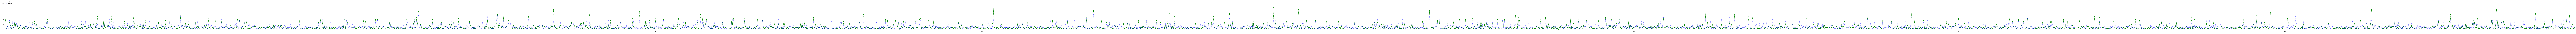

In [153]:
fig = plt.figure(figsize=(500,6))
ax1 = fig.add_subplot(111)
test_y_to_show['Appliances'].plot(ax=ax1,style='go-.',alpha=1,label='actual')    # alpha表示点的透明程度
test_y_to_show['predict'].plot(ax=ax1,style='bD--',alpha=0.4,label='predict')  # v指三角形，D指正方形
# plt.xticks(np.arange(1990,2016))
plt.xlabel('index')             
# ax1.set_yticks(np.arange(0,0.9,0.1))       # 设置左边纵坐标刻度
ax1.set_ylabel('appliance')                  # 设置左边纵坐标标签
plt.legend(loc=2)              # 设置图例在左上方

# ax2 = ax1.twinx()#共用一个x轴，但是y的坐标范围可以调整
# df['净流入人口/常住人口'].plot(ax=ax2,grid=True,label='净流入人口/常住人口',style='y>-.',alpha=0.7)
# ax2.set_yticks(np.arange(0,0.121,0.015))  # 设置右边纵坐标刻度
# ax2.set_ylabel('净流入人口/常住人口')       # 设置右边纵坐标标签
# plt.legend(loc=1)              # 设置图例在右上方
# plt.title('江苏历年城镇化率')   # 给整张图命名

plt.show()

In [154]:
grid_search.best_estimator_.feature_importances_

array([0.14621802, 0.0803098 , 0.08181917, 0.07901828, 0.07833871,
       0.076791  , 0.08202977, 0.07729906, 0.07731563, 0.07493881,
       0.07290438, 0.07301738])

In [155]:
#基于我们划分好的训练集得到的各特征值重要性的排序
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)#从小到大排列，提取出index（下标从0开始）
feature_indices

array([10, 11,  9,  5,  7,  8,  4,  3,  1,  2,  6,  0])

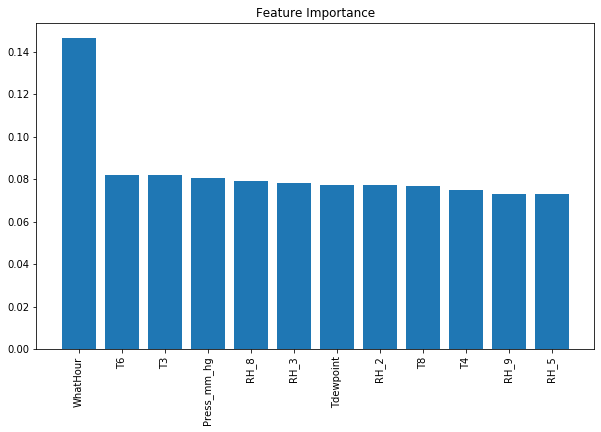

In [156]:
importances = grid_search.best_estimator_.feature_importances_#各特征的重要性程度
indices = np.argsort(importances)[::-1]#得到反序：从大到小
names = [train_X.columns[i] for i in indices]
#图形展示
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices])#对21个特征值的重要性排列展示
plt.xticks(range(train_X.shape[1]), names, rotation=90)
plt.show()

# LSTM

In [28]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [29]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [30]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
data1 = data[col_target + col_time + feature]

In [31]:
import pandas as pd

data1["date"]=pd.to_datetime(data1["date"])
data1 = data1.set_index(['date'], drop=True)
data1.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Appliances  RH_out       RH_8       RH_1     T3  \
date                                                                   
2016-01-11 17:00:00          60    92.0  48.900000  47.596667  19.79   
2016-01-11 17:10:00          60    92.0  48.863333  46.693333  19.79   
2016-01-11 17:20:00          50    92.0  48.730000  46.300000  19.79   
2016-01-11 17:30:00          50    92.0  48.590000  46.066667  19.79   
2016-01-11 17:40:00          60    92.0  48.590000  46.333333  19.79   

                          RH_3    T2  Press_mm_hg       RH_2       RH_7  ...  \
date                                                                     ...   
2016-01-11 17:00:00  44.730000  19.2        733.5  44.790000  41.626667  ...   
2016-01-11 17:10:00  44.790000  19.2        733.6  44.722500  41.560000  ...   
2016-01-11 17:20:00  44.933333  19.2        733.7  44.626667  41.433333  ...   
2016-01-11 17:30:00  45.000000  19.2        733.8  44.590000  41.290000  ...   
2016-01-11 17:40:00  45.000000  19.2        733.9  44.530000  41.230000  ...   

                          RH_4   RH_5     T_out   RH_9         T4         T7  \
date                                                                           
2016-01-11 17:00:00  45.566667  55.20  6.600000  45.53  19.000000  17.200000   
2016-01-11 17:10:00  45.992500  55.20  6.483333  45.56  19.000000  17.200000   
2016-01-11 17:20:00  45.890000  55.09  6.366667  45.50  18.926667  17.200000   
2016-01-11 17:30:00  45.723333  55.09  6.250000  45.40  18.890000  17.133333   
2016-01-11 17:40:00  45.530000  55.09  6.133333  45.40  18.890000  17.200000   

                     Tdewpoint  Windspeed     T1         T5  
date                                                         
2016-01-11 17:00:00        5.3   7.000000  19.89  17.166667  
2016-01-11 17:10:00        5.2   6.666667  19.89  17.166667  
2016-01-11 17:20:00        5.1   6.333333  19.89  17.166667  
2016-01-11 17:30:00        5.0   6.000000  19.89  17.166667  
2016-01-11 17:40:00        4.9   5.666667  19.89  17.200000  

[5 rows x 22 columns]

In [32]:
values=data1.values
values.shape

(19735, 22)

In [33]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [34]:
reframed = series_to_supervised(scaled, 1, 1)

In [35]:
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.894737   0.661412   0.566187   0.215188   0.746066   
2   0.046729   0.894737   0.660155   0.541326   0.215188   0.748871   
3   0.037383   0.894737   0.655586   0.530502   0.215188   0.755569   
4   0.037383   0.894737   0.650788   0.524080   0.215188   0.758685   
5   0.046729   0.894737   0.650788   0.531419   0.215188   0.758685   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var13(t)  var14(t)  \
1   0.225345   0.097674   0.684038    0.653428  ...  0.782437  0.381691   
2   0.225345   0.100000   0.682140    0.651064  ...  0.778062  0.380037   
3   0.225345   0.102326   0.679445    0.646572  ...  0.770949  0.380037   
4   0.225345   0.104651   0.678414    0.641489  ...  0.762697  0.380037   
5   0.225345   0.106977   0.676727    0.639362  ...  0.771233  0.379135   

   var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  \
1  0.369239  0.678532  0.351351  0.170594  0.533937  0.476190   0.32735   
2  0.365488  0.676049  0.344745  0.170594  0.529412  0.452381   0.32735   
3  0.361736  0.671909  0.341441  0.164310  0.524887  0.428571   0.32735   
4  0.357985  0.671909  0.341441  0.170594  0.520362  0.404762   0.32735   
5  0.354234  0.667357  0.341441  0.164310  0.515837  0.380952   0.32735   

   var22(t)  
1  0.175506  
2  0.175506  
3  0.175506  
4  0.178691  
5  0.172320  

[5 rows x 44 columns]

In [ ]:
reframed.drop(reframed.columns[[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [37]:
values = reframed.values

In [38]:
X = values[:,:21]
Y = values[:,21]

In [39]:
X.shape

(19734, 21)

In [40]:
X

array([[0.04672897, 0.89473684, 0.66141193, ..., 0.53846154, 0.5       ,
        0.32734952],
       [0.04672897, 0.89473684, 0.66015536, ..., 0.53393665, 0.47619048,
        0.32734952],
       [0.03738318, 0.89473684, 0.65558602, ..., 0.52941176, 0.45238095,
        0.32734952],
       ...,
       [0.07476636, 0.42105263, 0.69191227, ..., 0.90045249, 0.25      ,
        0.91974657],
       [0.24299065, 0.4254386 , 0.68745716, ..., 0.89894419, 0.26190476,
        0.91974657],
       [0.38317757, 0.42982456, 0.68261652, ..., 0.8974359 , 0.27380952,
        0.91974657]])

In [41]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [42]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Train on 13813 samples, validate on 5921 samples
Epoch 1/70
 - 2s - loss: 0.0063 - val_loss: 0.0037
Epoch 2/70
 - 2s - loss: 0.0036 - val_loss: 0.0035
Epoch 3/70
 - 2s - loss: 0.0035 - val_loss: 0.0034
Epoch 4/70
 - 2s - loss: 0.0034 - val_loss: 0.0033
Epoch 5/70
 - 2s - loss: 0.0032 - val_loss: 0.0032
Epoch 6/70
 - 2s - loss: 0.0031 - val_loss: 0.0031
Epoch 7/70
 - 2s - loss: 0.0030 - val_loss: 0.0029
Epoch 8/70
 - 2s - loss: 0.0028 - val_loss: 0.0028
Epoch 9/70
 - 2s - loss: 0.0027 - val_loss: 0.0027
Epoch 10/70
 - 2s - loss: 0.0026 - val_loss: 0.0026
Epoch 11/70
 - 2s - loss: 0.0026 - val_loss: 0.0026
Epoch 12/70
 - 2s - loss: 0.0025 - val_loss: 0.0025
Epoch 13/70
 - 2s - loss: 0.0025 - val_loss: 0.0025
Epoch 14/70
 - 2s - loss: 0.0025 - val_loss: 0.0025
Epoch 15/70
 - 2s - loss: 0.0024 - val_loss: 0.0025
Epoch 16/70
 - 2s - loss: 0.0024 - val_loss: 0.0024
Epoch 17/70
 - 2s - loss: 0.0024 - val_loss: 0.0024
Epoch 18/70
 - 2s - loss: 0.0024 - val_loss: 0.0024
Epoch 19/70
 - 2s - loss

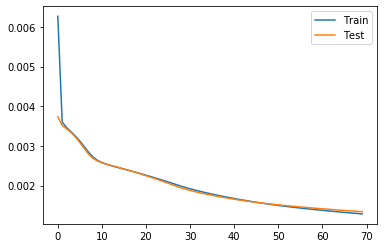

In [45]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [46]:
sca=DataFrame(scaled)
sca.head()

0         1         2         3         4         5         6   \
0  0.046729  0.894737  0.661412  0.566187  0.215188  0.746066  0.225345   
1  0.046729  0.894737  0.660155  0.541326  0.215188  0.748871  0.225345   
2  0.037383  0.894737  0.655586  0.530502  0.215188  0.755569  0.225345   
3  0.037383  0.894737  0.650788  0.524080  0.215188  0.758685  0.225345   
4  0.046729  0.894737  0.650788  0.531419  0.215188  0.758685  0.225345   

         7         8         9   ...        12        13        14        15  \
0  0.097674  0.684038  0.653428  ...  0.764262  0.381691  0.372990  0.677290   
1  0.100000  0.682140  0.651064  ...  0.782437  0.381691  0.369239  0.678532   
2  0.102326  0.679445  0.646572  ...  0.778062  0.380037  0.365488  0.676049   
3  0.104651  0.678414  0.641489  ...  0.770949  0.380037  0.361736  0.671909   
4  0.106977  0.676727  0.639362  ...  0.762697  0.380037  0.357985  0.671909   

         16        17        18        19       20        21  
0  0.351351  0.170594  0.538462  0.500000  0.32735  0.175506  
1  0.351351  0.170594  0.533937  0.476190  0.32735  0.175506  
2  0.344745  0.170594  0.529412  0.452381  0.32735  0.175506  
3  0.341441  0.164310  0.524887  0.428571  0.32735  0.175506  
4  0.341441  0.170594  0.520362  0.404762  0.32735  0.178691  

[5 rows x 22 columns]

In [47]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

5921/5921 [==============================] - 2s 383us/step
Test MSE: 0.001344


In [48]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.961
The R2 score on the Test set is:	0.956


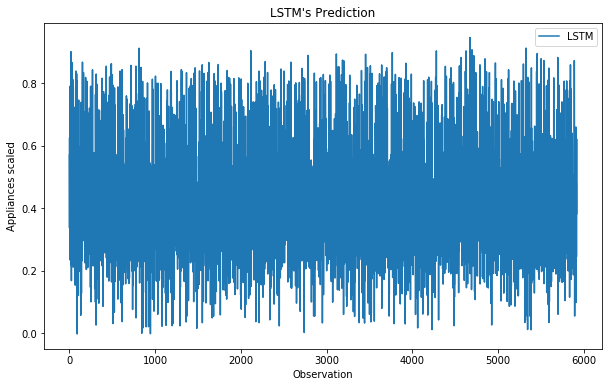

In [49]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(10, 6))
#plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

In [87]:
# make a prediction
yhat = model.predict(X_Test)
X_Test = X_Test.reshape((X_Test.shape[0], 21))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_Test[:, -21:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = np.concatenate((Y_Test, X_Test[:, -21:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 38.067
